In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
%matplotlib inline

plt.rcParams["figure.figsize"] = 12,8
%config Completer.use_jedi=False

In [2]:
# Identifying the proper column names to the data set.

#column names
names = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot",
         "num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations",
         "num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate",
         "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate", "srv_diff_host_rate",
         "dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
         "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate",
         "dst_host_srv_rerror_rate","attack", "last_flag"]

data_train = pd.read_csv(r"E:\DSP\DSP_22nd Nov\Machine Learning\FInal Class\Case Studies & FInal Projects\3\NSL_Dataset\Train.txt",names=names)
data_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
duration                       125973 non-null int64
protocol_type                  125973 non-null object
service                        125973 non-null object
flag                           125973 non-null object
src_bytes                      125973 non-null int64
dst_bytes                      125973 non-null int64
land                           125973 non-null int64
wrong_fragment                 125973 non-null int64
urgent                         125973 non-null int64
hot                            125973 non-null int64
num_failed_logins              125973 non-null int64
logged_in                      125973 non-null int64
num_compromised                125973 non-null int64
root_shell                     125973 non-null int64
su_attempted                   125973 non-null int64
num_root                       125973 non-null int64
num_file_creations             125973 

output_train = pandas_profiling.ProfileReport(data_train)
output_train.to_file(outputfile = "Pandas_Profiling_train1.html")

#### Observations from Pandas_profiling Report

The below 8 variables are having high correlation .

NOne of the variables have got any missing values

NOne of the variables have CV > 0.1

dst_host_rerror_rate is highly correlated with srv_rerror_rate (ρ = 0.91782)

dst_host_serror_rate is highly correlated with srv_serror_rate (ρ = 0.9776)

dst_host_srv_rerror_rate is highly correlated with dst_host_rerror_rate (ρ = 0.92469)

dst_host_srv_serror_rate is highly correlated with dst_host_serror_rate (ρ = 0.98505)

num_outbound_cmds has constant value 0

num_root is highly correlated with num_compromised (ρ = 0.99883)

srv_rerror_rate is highly correlated with rerror_rate (ρ = 0.98901)

srv_serror_rate is highly correlated with serror_rate (ρ = 0.99329)


In [4]:
data_train.drop(columns=["dst_host_rerror_rate","dst_host_serror_rate","dst_host_srv_rerror_rate","dst_host_srv_serror_rate","num_outbound_cmds","num_root","srv_rerror_rate","srv_serror_rate"],axis = 1,inplace=True)

In [5]:
data_train.info() # 8 variables removed , 35 variables left

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 35 columns):
duration                       125973 non-null int64
protocol_type                  125973 non-null object
service                        125973 non-null object
flag                           125973 non-null object
src_bytes                      125973 non-null int64
dst_bytes                      125973 non-null int64
land                           125973 non-null int64
wrong_fragment                 125973 non-null int64
urgent                         125973 non-null int64
hot                            125973 non-null int64
num_failed_logins              125973 non-null int64
logged_in                      125973 non-null int64
num_compromised                125973 non-null int64
root_shell                     125973 non-null int64
su_attempted                   125973 non-null int64
num_file_creations             125973 non-null int64
num_shells                     125973 

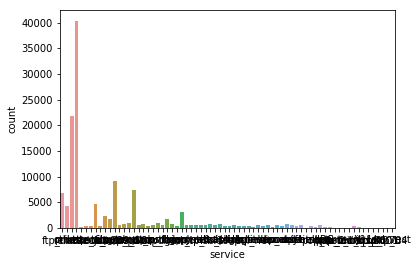

In [6]:
sns.countplot(data_train["service"])

C:\Users\Akhtar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


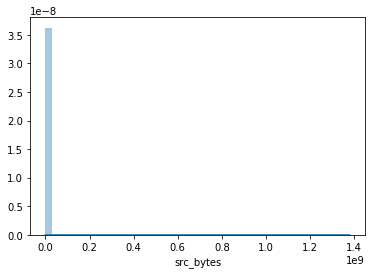

In [7]:
sns.distplot(data_train["src_bytes"])

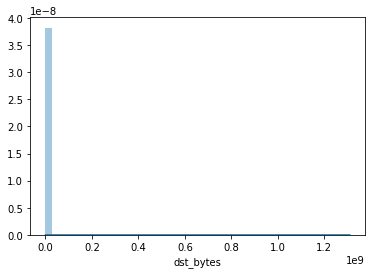

In [8]:
sns.distplot(data_train["dst_bytes"])

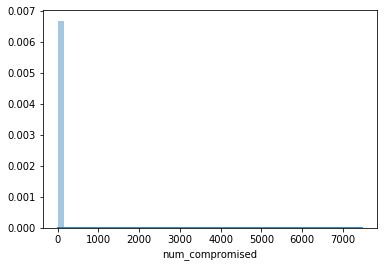

In [9]:
sns.distplot(data_train["num_compromised"])

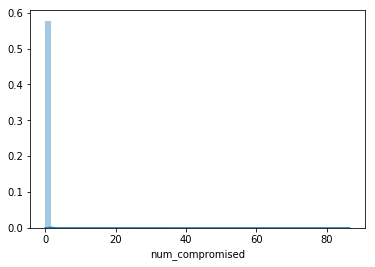

In [10]:
sns.distplot(np.sqrt(data_train["num_compromised"]))

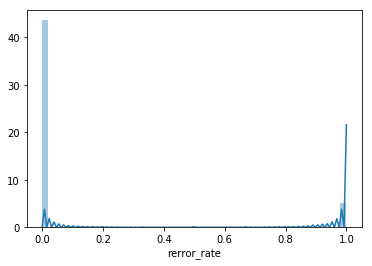

In [11]:
sns.distplot(data_train["rerror_rate"])

In [12]:
data_train.src_bytes.value_counts()

0             49392
8              3691
1              2432
44             2334
45             2089
1032           2001
46             1294
43             1284
105             998
147             948
54540           897
28              895
42              764
30              711
146             685
520             647
334             560
18              555
215             457
207             399
224             388
216             369
221             366
222             364
516             362
214             360
209             357
217             349
218             341
232             341
              ...  
26280             1
250777            1
37681             1
15974             1
13796             1
3744              1
44788             1
1953              1
405412            1
2147              1
45172             1
2339              1
2467              1
1379963888        1
7329              1
3555              1
1634              1
2722              1
1698              1


In [13]:
data_train["target"] = np.where(data_train.attack == "normal",0,1)

In [14]:
#percentage of attacks
attacks = data_train[data_train['target'] == 1]['target'].count()
percent_attacks = attacks/len(data_train)
print(f"The percent of anomolies in the training set are: {percent_attacks*100}")

The percent of anomolies in the training set are: 46.54171925730117


#### So, we have around 47% of our data classified as an Attack. This brings us to a conclusion that the data set provided is nearly a well balanced one.

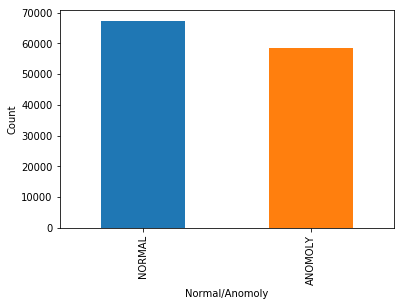

In [15]:
data_train['target'].value_counts().plot.bar()
plt.xticks([0,1],['NORMAL','ANOMOLY'])
plt.ylabel('Count')
plt.xlabel('Normal/Anomoly')
plt.show()

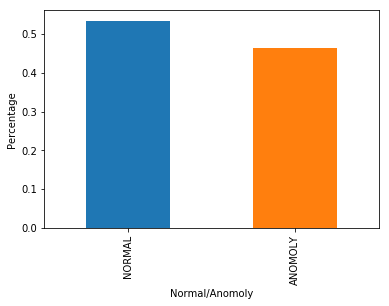

In [16]:
(data_train['target'].value_counts()/len(data_train)).plot.bar()
plt.xticks([0,1],['NORMAL','ANOMOLY'])
plt.ylabel('Percentage')
plt.xlabel('Normal/Anomoly')
plt.show()

#### In the description of the data, it is given that, 'Flag' is used to determine the status of the connection. So, let us examine how various flags are distributed

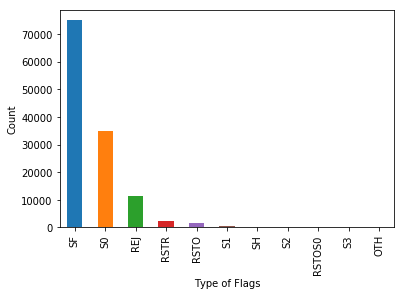

In [17]:
data_train['flag'].value_counts().plot.bar()
plt.ylabel('Count')
plt.xlabel('Type of Flags')
plt.show()

#### It can be seen that, flags 'SF' and 'S0' are present more in number than rest of the flags. Now let us also see, how unusual traffic is distributed among these flags. The question here is to identify, which flags can be mostly used to identify intrusions in the network.

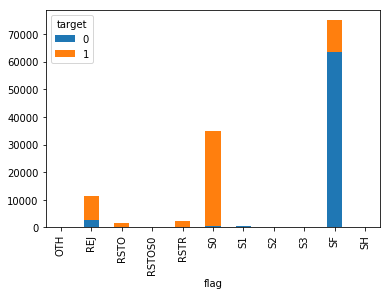

In [18]:
pd.crosstab(data_train['flag'],data_train['target']).plot.bar(stacked = True)
plt.show()

#### From the above bar graph, it is quite evident that, presence of the flag 'S0' can be related to presence of an anomoly in the network. While Flag 'SF' has more normal traffic, also has some intrusions. Flags, 'RSTO' and 'RSTR' can be identified with unusual traffic.
####  flag_S0 , flag_REJ , flag_RSTO , flag_RSTR 

In [19]:
#Attacks over various destination services
s = pd.crosstab(data_train['service'],data_train['target'])

#sorting and viewing  the cross table
s.sort_values(1, ascending = False)

target,0,1
service,,
private,982,20871
eco_i,497,4089
ecr_i,190,2887
http,38049,2289
ftp_data,4984,1876
other,2604,1755
telnet,917,1436
finger,545,1222
Z39_50,0,862


#### Some services have more number of attacks than the rest. Also, some services are only labelled as attacks.This feature may be very crucial for us in our predictions.

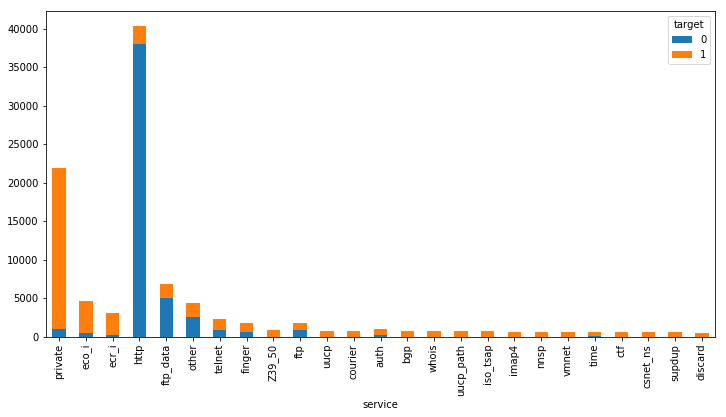

In [20]:
#bar graph over various serices
s.sort_values(1, ascending = False).head(25).plot.bar(stacked = True)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

#### It is evident from the graph that 'private' service is prone to attacks than a 'http' service where most of the normal traffic is. Also, it can be seen that, some attacks like 'auth', 'courier' has only unusual traffic on them.

In [21]:
#making a list of content related fetures
content = ['num_failed_logins','num_compromised','num_file_creations','num_shells', 'num_access_files','target']

#subsetting the dataset on content related features.
data_train_content = data_train[content]

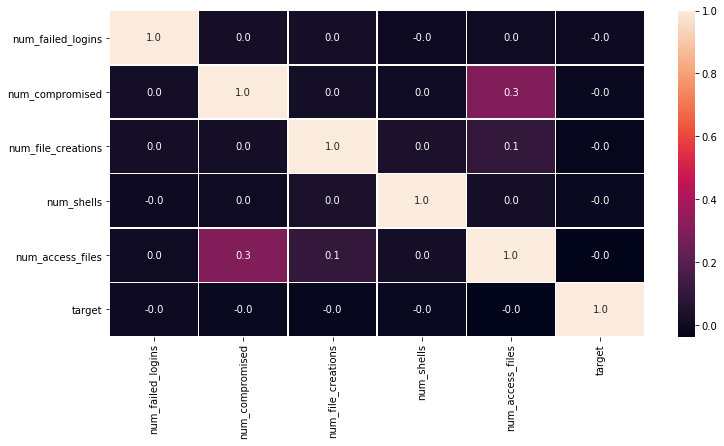

In [22]:
#heatmap of content related features
sns.heatmap(data_train_content.corr(), linewidths=.5,annot=True,fmt="1.1f")
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

In [23]:
#making a list of time related fetures
time = ['count', 'srv_count', 'serror_rate', 'rerror_rate', 'same_srv_rate','diff_srv_rate', 'srv_diff_host_rate',"target"]

#subsetting time related features
data_train_time = data_train[time]

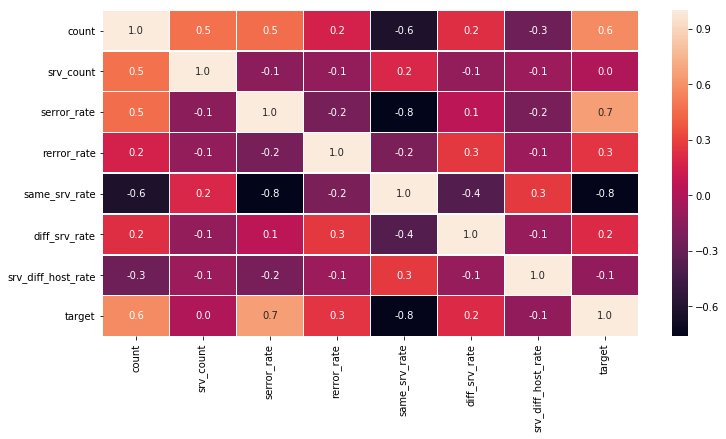

In [24]:
sns.heatmap(data_train_time.corr(), linewidths=.5,annot=True,fmt="1.1f")
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

In [25]:
#host related features
host = ["dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","target"]

#subsetting host related features
data_train_host = data_train[host]

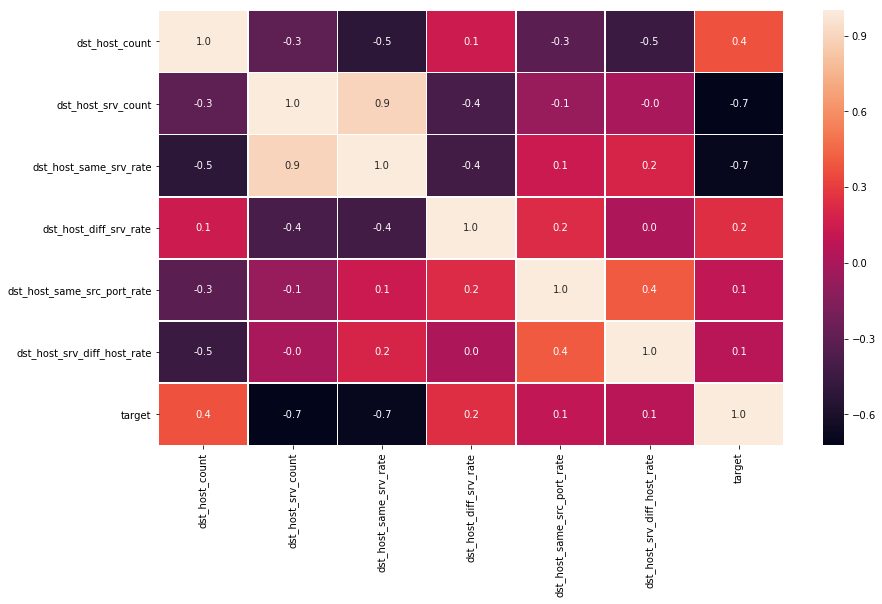

In [26]:
sns.heatmap(data_train_host.corr(), linewidths=.5,annot=True,fmt='1.1f')
fig = plt.gcf()
fig.set_size_inches(14,8)
plt.show()

### Feature Encoding

In [27]:
#Determining Categorical variables in the data set
for col in data_train.columns:
    if data_train[col].dtypes == 'object':
        print(f"The feature:{col} has {len(data_train[col].unique())} categories.")

The feature:protocol_type has 3 categories.
The feature:service has 70 categories.
The feature:flag has 11 categories.
The feature:attack has 23 categories.


In [28]:
data_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,attack,last_flag,target
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.00,150,25,0.17,0.03,0.17,0.00,normal,20,0
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,255,1,0.00,0.60,0.88,0.00,normal,15,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,255,26,0.10,0.05,0.00,0.00,neptune,19,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,30,255,1.00,0.00,0.03,0.04,normal,21,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.09,255,255,1.00,0.00,0.00,0.00,normal,21,0


In [29]:
data_train.drop(["attack"],axis = 1,inplace = True)

In [30]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 35 columns):
duration                       125973 non-null int64
protocol_type                  125973 non-null object
service                        125973 non-null object
flag                           125973 non-null object
src_bytes                      125973 non-null int64
dst_bytes                      125973 non-null int64
land                           125973 non-null int64
wrong_fragment                 125973 non-null int64
urgent                         125973 non-null int64
hot                            125973 non-null int64
num_failed_logins              125973 non-null int64
logged_in                      125973 non-null int64
num_compromised                125973 non-null int64
root_shell                     125973 non-null int64
su_attempted                   125973 non-null int64
num_file_creations             125973 non-null int64
num_shells                     125973 

In [31]:
numeric_var_names=[key for key in dict(data_train.dtypes) if dict(data_train.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(data_train.dtypes) if dict(data_train.dtypes)[key] in ['object']]
print(numeric_var_names)
print(cat_var_names)

['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'last_flag', 'target']
['protocol_type', 'service', 'flag']


In [32]:
data_train_cat = data_train[cat_var_names]

In [33]:
data_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 3 columns):
protocol_type    125973 non-null object
service          125973 non-null object
flag             125973 non-null object
dtypes: object(3)
memory usage: 2.9+ MB


In [34]:
data_train_cat.head()

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


In [35]:
data_train_num = data_train[numeric_var_names]

In [36]:
data_train_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 32 columns):
duration                       125973 non-null int64
src_bytes                      125973 non-null int64
dst_bytes                      125973 non-null int64
land                           125973 non-null int64
wrong_fragment                 125973 non-null int64
urgent                         125973 non-null int64
hot                            125973 non-null int64
num_failed_logins              125973 non-null int64
logged_in                      125973 non-null int64
num_compromised                125973 non-null int64
root_shell                     125973 non-null int64
su_attempted                   125973 non-null int64
num_file_creations             125973 non-null int64
num_shells                     125973 non-null int64
num_access_files               125973 non-null int64
is_host_login                  125973 non-null int64
is_guest_login                 125973 non

In [37]:
data_train_num.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,last_flag,target
0,0,491,0,0,0,0,0,0,0,0,...,0.00,0.00,150,25,0.17,0.03,0.17,0.00,20,0
1,0,146,0,0,0,0,0,0,0,0,...,0.15,0.00,255,1,0.00,0.60,0.88,0.00,15,0
2,0,0,0,0,0,0,0,0,0,0,...,0.07,0.00,255,26,0.10,0.05,0.00,0.00,19,1
3,0,232,8153,0,0,0,0,0,1,0,...,0.00,0.00,30,255,1.00,0.00,0.03,0.04,21,0
4,0,199,420,0,0,0,0,0,1,0,...,0.00,0.09,255,255,1.00,0.00,0.00,0.00,21,0


In [38]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

for c_feature in data_train_cat:
    data_train_cat[c_feature] = data_train_cat[c_feature].astype('category')
    data_train_cat = create_dummies(data_train_cat , c_feature )

C:\Users\Akhtar\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [39]:
data_train_cat.info()  # 81 category columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 81 columns):
protocol_type_tcp      125973 non-null uint8
protocol_type_udp      125973 non-null uint8
service_X11            125973 non-null uint8
service_Z39_50         125973 non-null uint8
service_aol            125973 non-null uint8
service_auth           125973 non-null uint8
service_bgp            125973 non-null uint8
service_courier        125973 non-null uint8
service_csnet_ns       125973 non-null uint8
service_ctf            125973 non-null uint8
service_daytime        125973 non-null uint8
service_discard        125973 non-null uint8
service_domain         125973 non-null uint8
service_domain_u       125973 non-null uint8
service_echo           125973 non-null uint8
service_eco_i          125973 non-null uint8
service_ecr_i          125973 non-null uint8
service_efs            125973 non-null uint8
service_exec           125973 non-null uint8
service_finger         125973 non-

In [40]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=data_train_num.apply(lambda x: var_summary(x)).T

In [41]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
duration,125973.0,0.0,3.617247e+07,287.144650,0.00,2.604515e+03,6.783500e+06,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4.00,9590.56,4.290800e+04
src_bytes,125973.0,0.0,5.740179e+09,45566.743000,44.00,5.870331e+06,3.446079e+13,0.0,0.0,0.00,0.00,0.00,44.00,276.00,848.00,1480.00,54540.00,1.379964e+09
dst_bytes,125973.0,0.0,2.491634e+09,19779.114421,0.00,4.021269e+06,1.617061e+13,0.0,0.0,0.00,0.00,0.00,0.00,516.00,3375.80,8314.00,25519.00,1.309937e+09
land,125973.0,0.0,2.500000e+01,0.000198,0.00,1.408607e-02,1.984174e-04,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125973.0,0.0,2.858000e+03,0.022687,0.00,2.535300e-01,6.427745e-02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.000000e+00
urgent,125973.0,0.0,1.400000e+01,0.000111,0.00,1.436603e-02,2.063827e-04,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.000000e+00
hot,125973.0,0.0,2.575000e+04,0.204409,0.00,2.149968e+00,4.622364e+00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,7.700000e+01
num_failed_logins,125973.0,0.0,1.540000e+02,0.001222,0.00,4.523914e-02,2.046580e-03,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.000000e+00
logged_in,125973.0,0.0,4.985200e+04,0.395736,0.00,4.890101e-01,2.391308e-01,0.0,0.0,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.000000e+00
num_compromised,125973.0,0.0,3.517800e+04,0.279250,0.00,2.394204e+01,5.732214e+02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,7.479000e+03


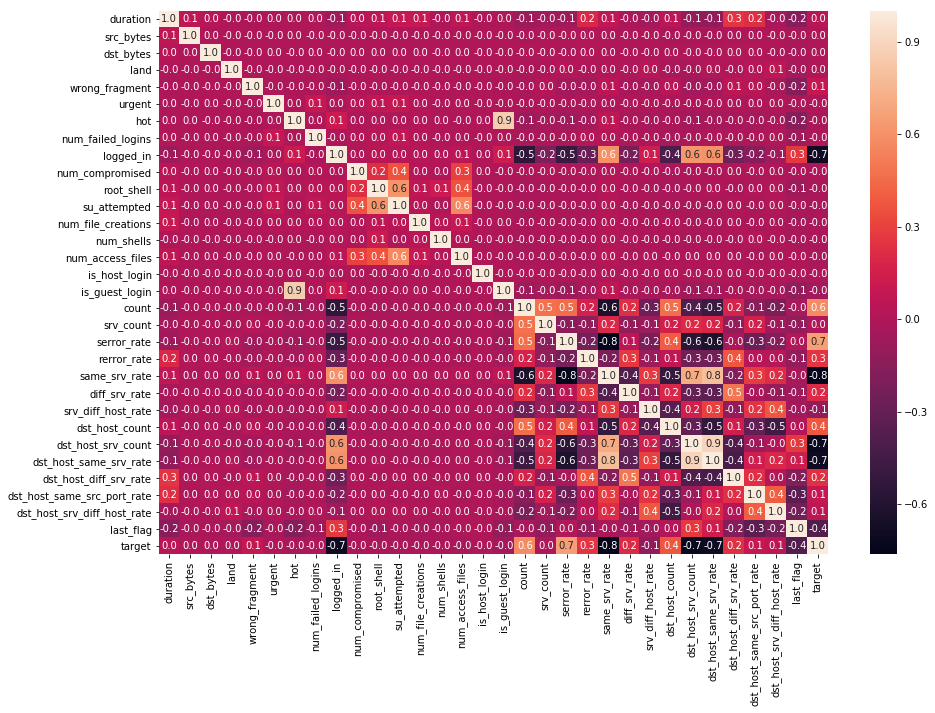

In [281]:
plt.subplots(figsize = (15,10))

sns.heatmap(data_train_num.corr(), annot=True , fmt="1.1f")

In [282]:
corr_data = pd.concat([data_train_num,data_train.target],axis=1)

In [283]:
corr_data.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,last_flag,target,target
0,0,491,0,0,0,0,0,0,0,0,...,0.00,150,25,0.17,0.03,0.17,0.00,20,0,0
1,0,146,0,0,0,0,0,0,0,0,...,0.00,255,1,0.00,0.60,0.88,0.00,15,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0.00,255,26,0.10,0.05,0.00,0.00,19,1,1
3,0,232,8153,0,0,0,0,0,1,0,...,0.00,30,255,1.00,0.00,0.03,0.04,21,0,0
4,0,199,420,0,0,0,0,0,1,0,...,0.09,255,255,1.00,0.00,0.00,0.00,21,0,0


In [285]:
corr = corr_data.corr()

In [286]:
corr.to_excel("Num-Corr-Metrics-Binary1.xlsx")

In [42]:
data_train_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 32 columns):
duration                       125973 non-null int64
src_bytes                      125973 non-null int64
dst_bytes                      125973 non-null int64
land                           125973 non-null int64
wrong_fragment                 125973 non-null int64
urgent                         125973 non-null int64
hot                            125973 non-null int64
num_failed_logins              125973 non-null int64
logged_in                      125973 non-null int64
num_compromised                125973 non-null int64
root_shell                     125973 non-null int64
su_attempted                   125973 non-null int64
num_file_creations             125973 non-null int64
num_shells                     125973 non-null int64
num_access_files               125973 non-null int64
is_host_login                  125973 non-null int64
is_guest_login                 125973 non

#### There are about 70 service categories. Let us see how attacks are distributed over these services.

In [43]:
s.sort_values(1, ascending = False)

target,0,1
service,,
private,982,20871
eco_i,497,4089
ecr_i,190,2887
http,38049,2289
ftp_data,4984,1876
other,2604,1755
telnet,917,1436
finger,545,1222
Z39_50,0,862


#### From the above table, it is visible that most of the services does not have any attacks on them. So, it is safe to say that, we can drop the service categories with less than 500 attacks on them.

In [44]:
data_train_num.shape

(125973, 32)

In [45]:
data_train_cat.shape

(125973, 81)

In [46]:
data_train_new = pd.concat([data_train_cat,data_train_num],axis = 1)

In [47]:
data_train_new.info() # 113 Columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Columns: 113 entries, protocol_type_tcp to target
dtypes: float64(9), int32(1), int64(22), uint8(81)
memory usage: 40.0 MB


###  Variable Reduction (Feature Engineering)

In [312]:
data_train_new.columns.difference(["target"])

Index(['count', 'diff_srv_rate', 'dst_bytes', 'dst_host_count',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_same_srv_rate', 'dst_host_srv_count',
       'dst_host_srv_diff_host_rate', 'duration',
       ...
       'service_uucp', 'service_uucp_path', 'service_vmnet', 'service_whois',
       'src_bytes', 'srv_count', 'srv_diff_host_rate', 'su_attempted',
       'urgent', 'wrong_fragment'],
      dtype='object', length=112)

#### Weight of Evidence

In [69]:
from matplotlib.backends.backend_pdf import PdfPages

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [1562]:
data_train_new['target'] = data_train.target

C:\Users\Akhtar\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
C:\Users\Akhtar\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


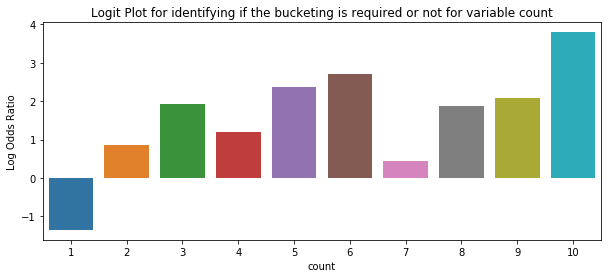

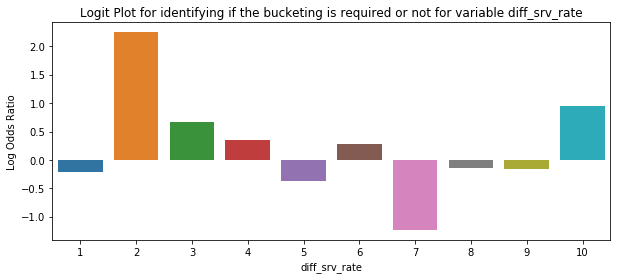

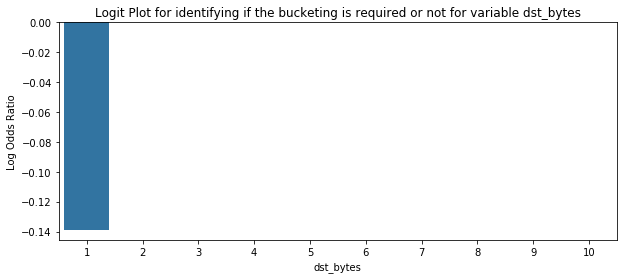

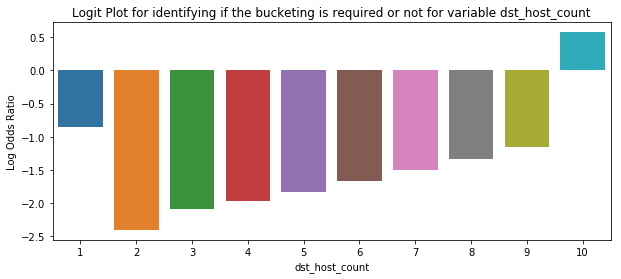

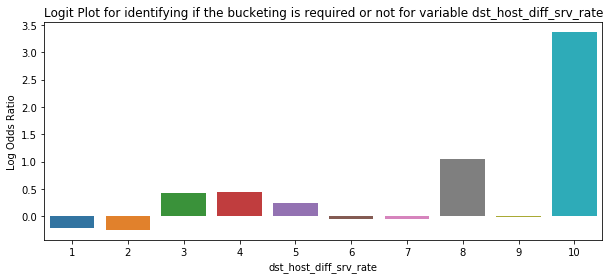

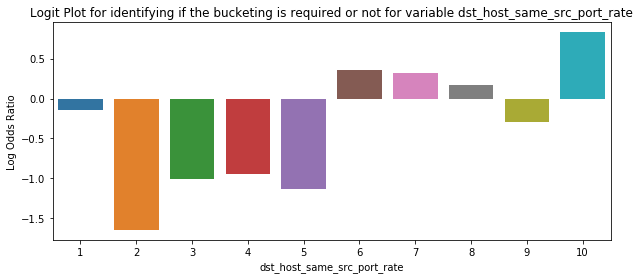

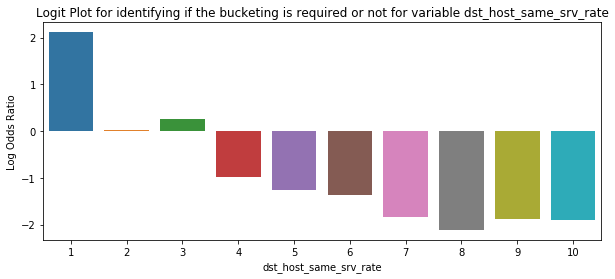

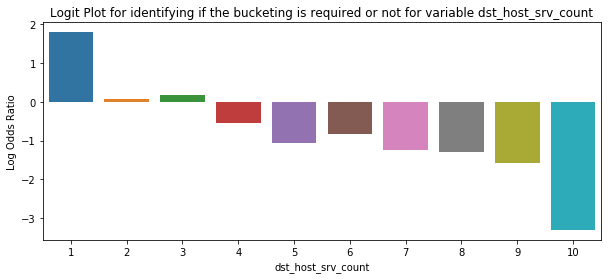

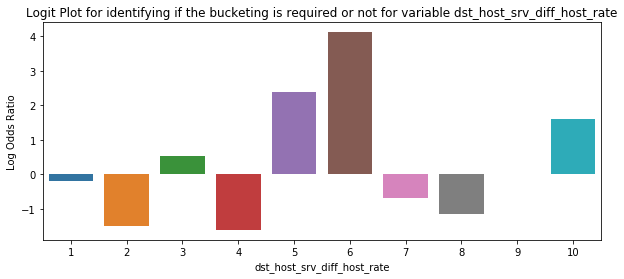

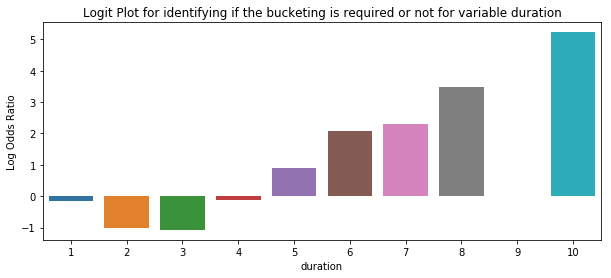

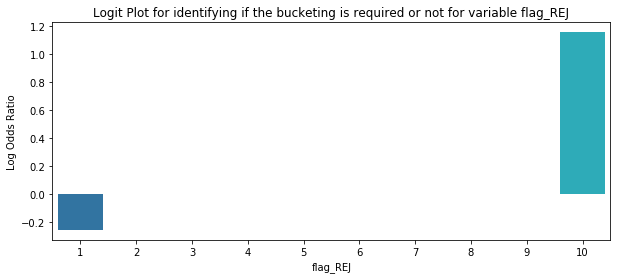

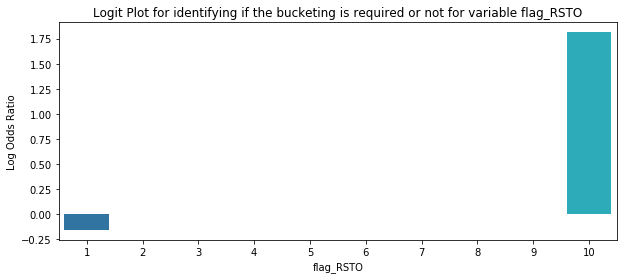

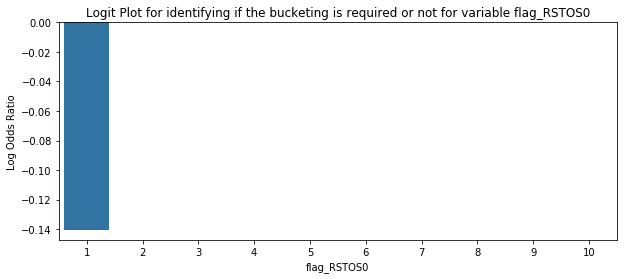

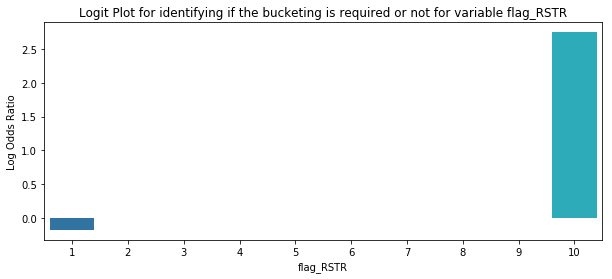

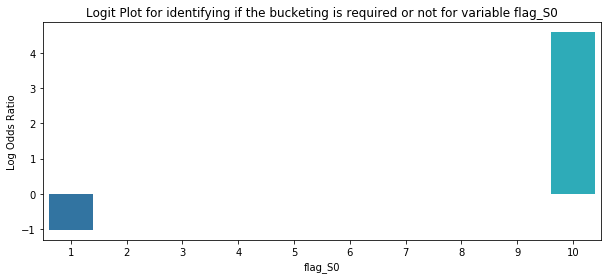

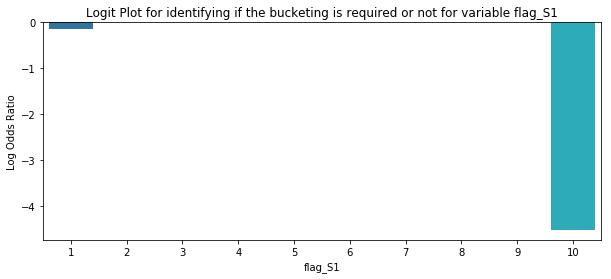

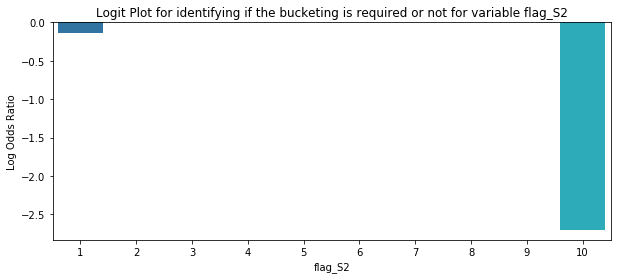

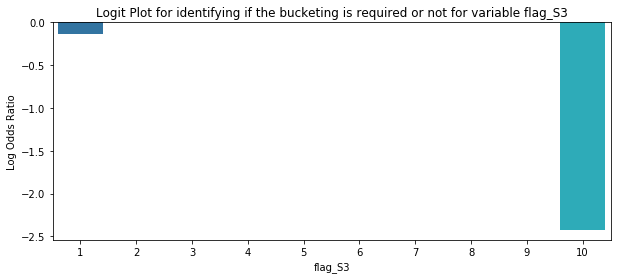

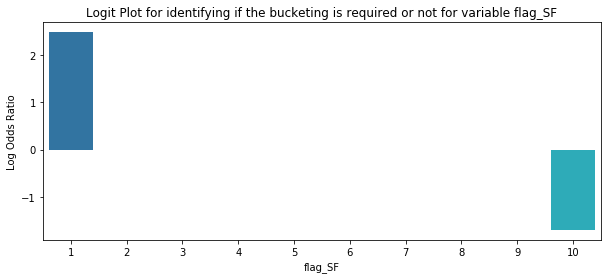

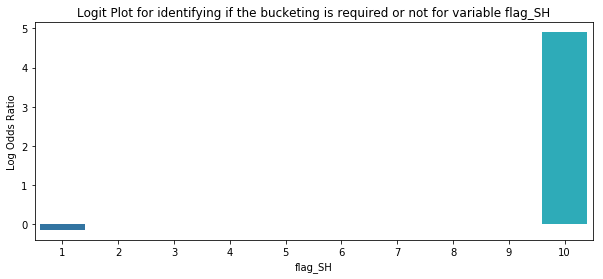

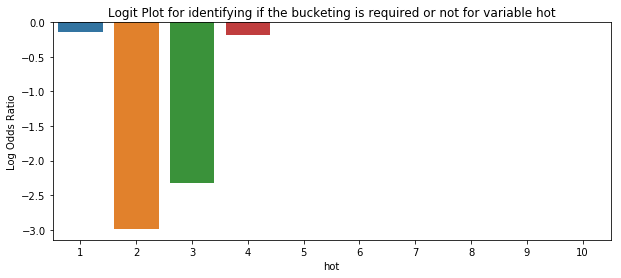

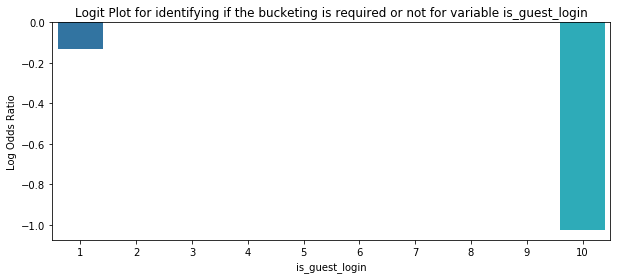

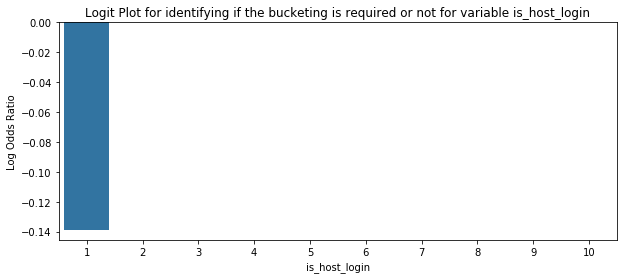

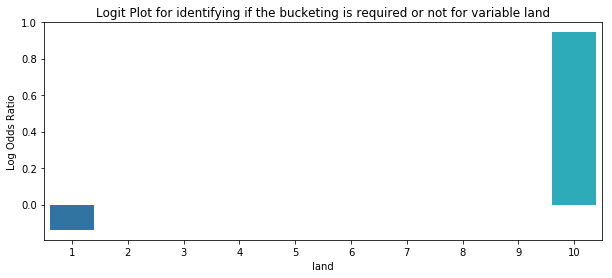

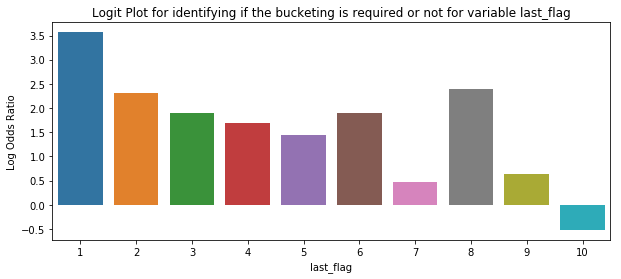

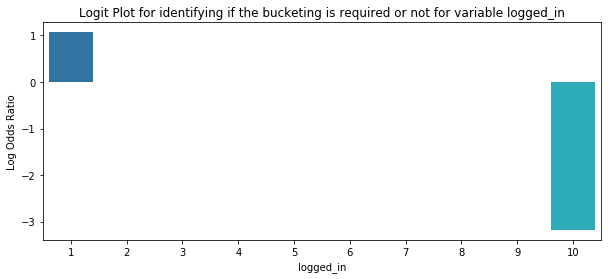

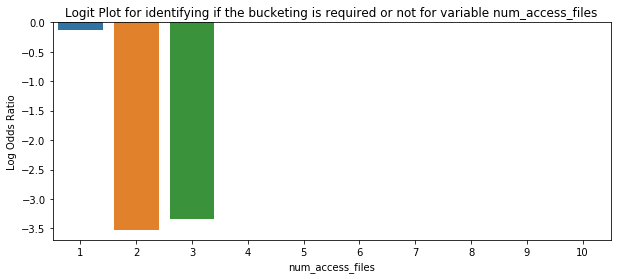

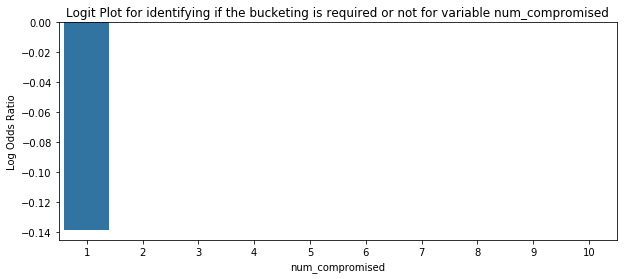

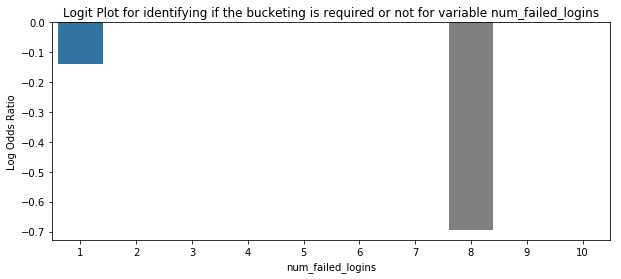

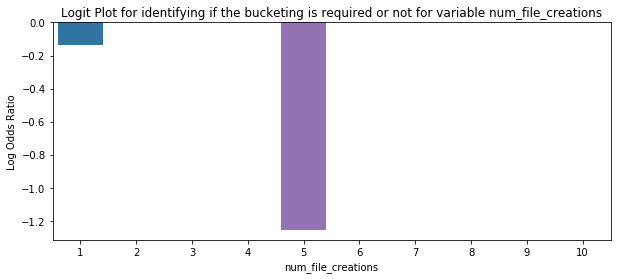

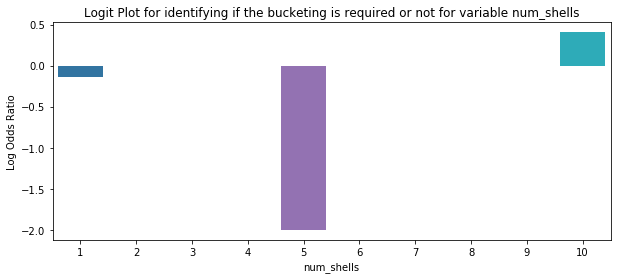

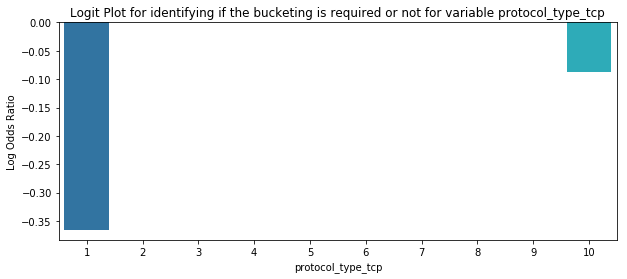

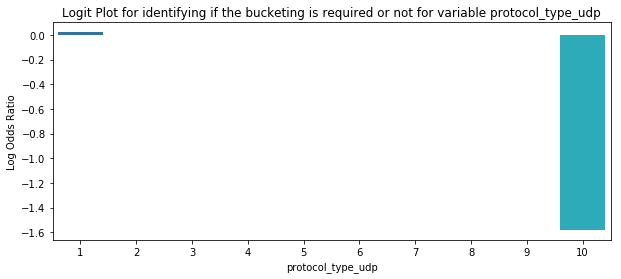

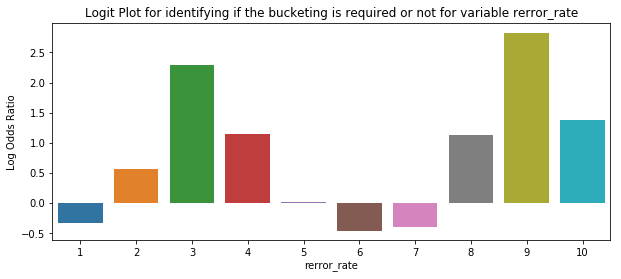

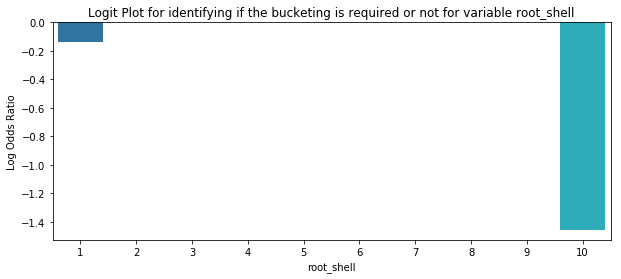

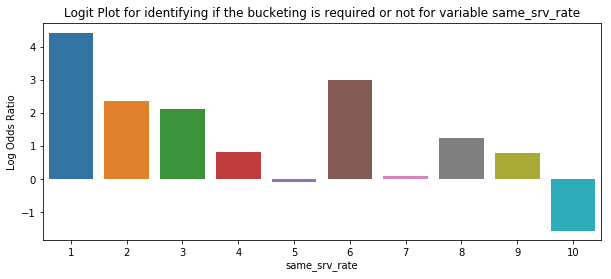

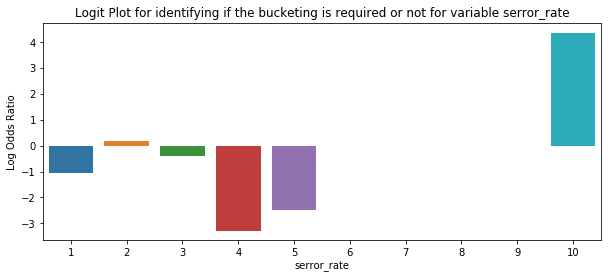

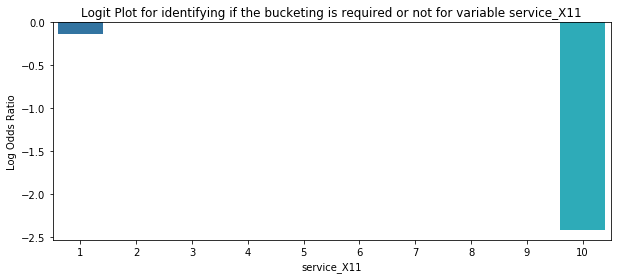

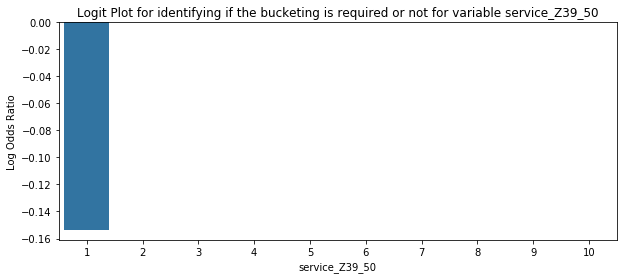

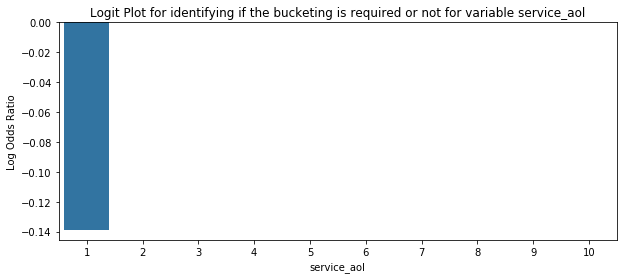

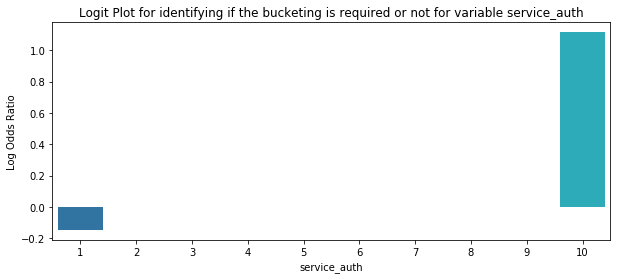

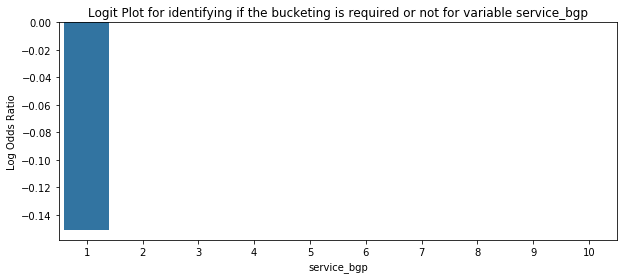

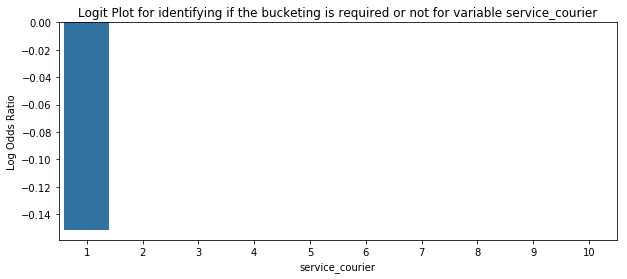

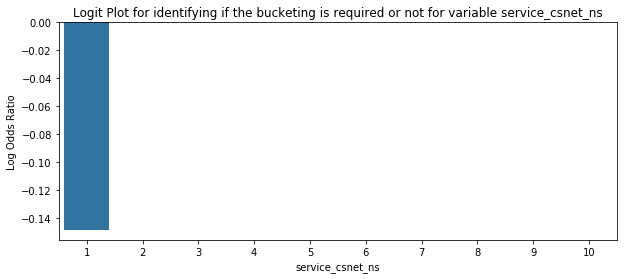

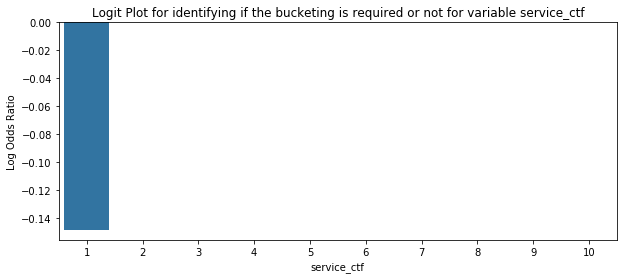

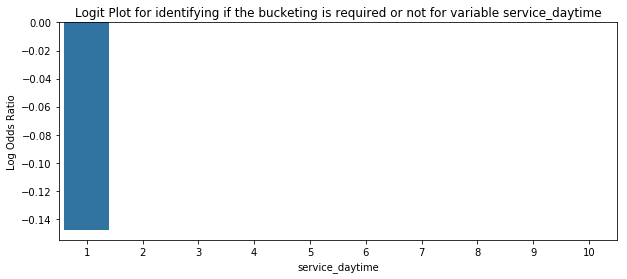

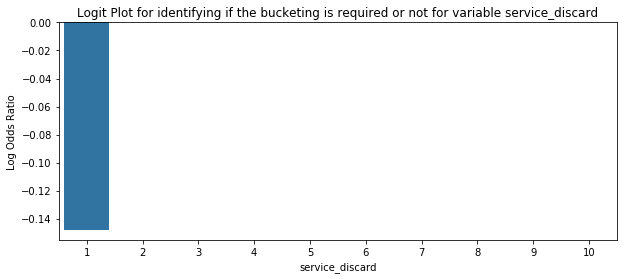

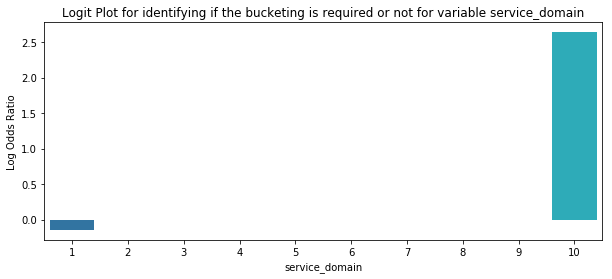

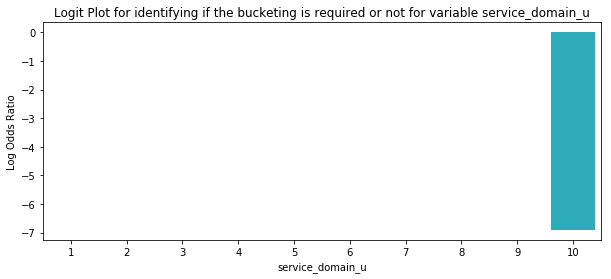

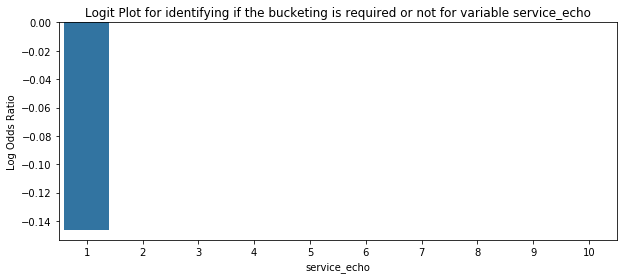

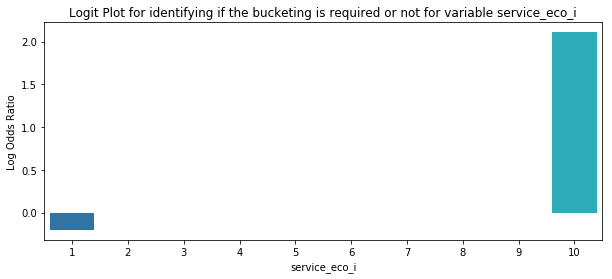

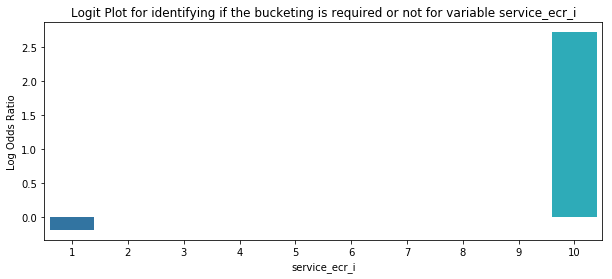

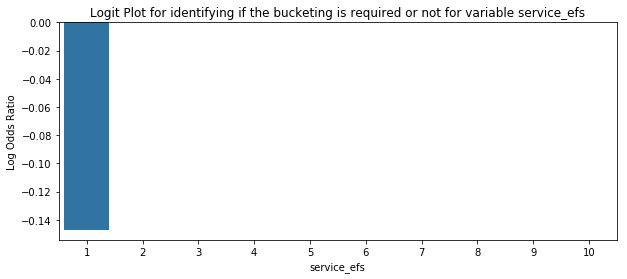

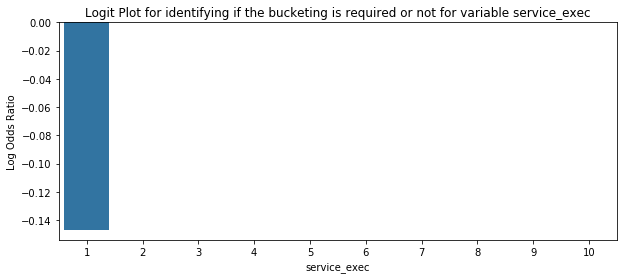

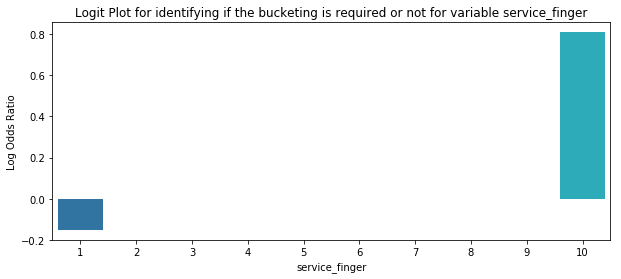

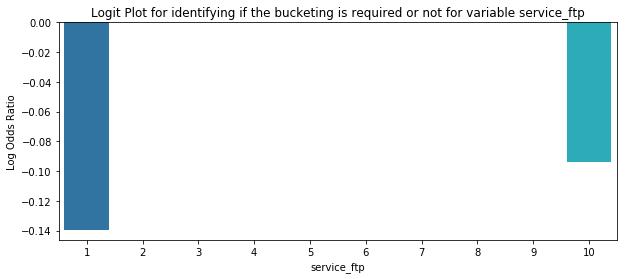

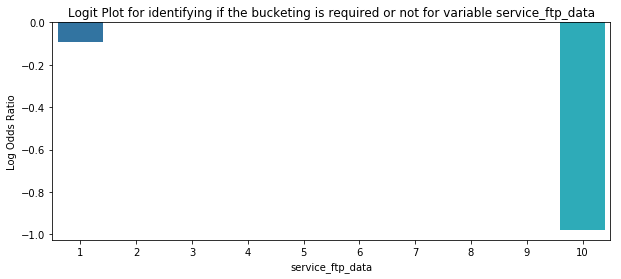

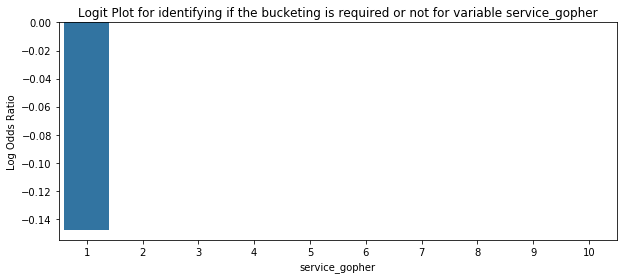

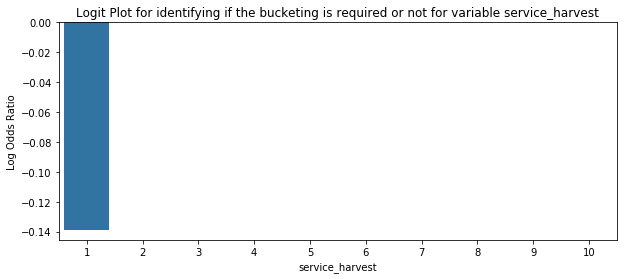

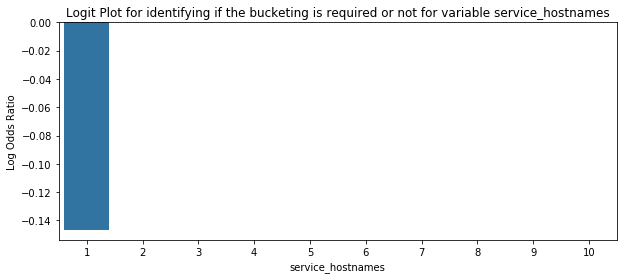

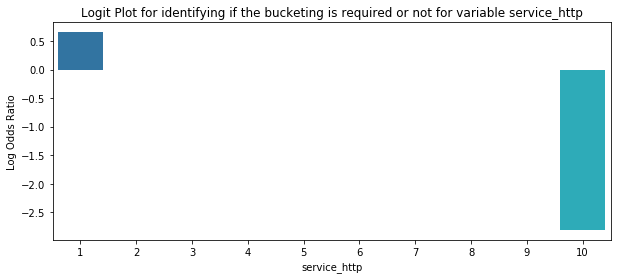

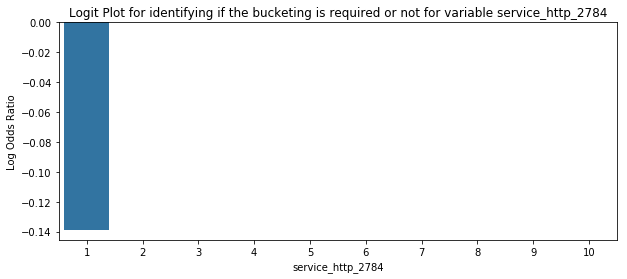

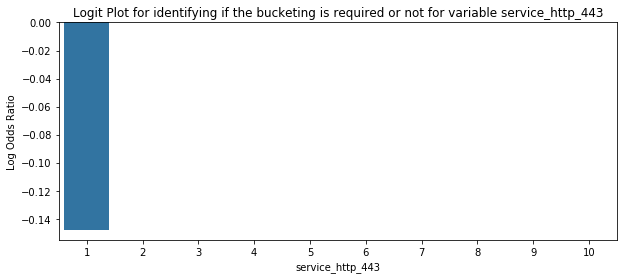

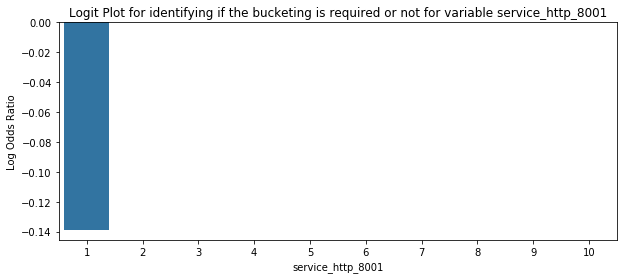

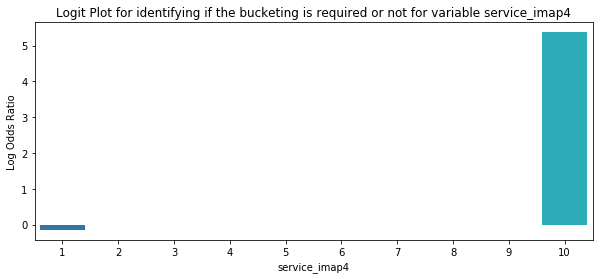

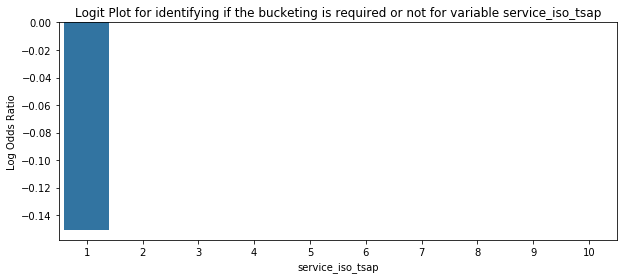

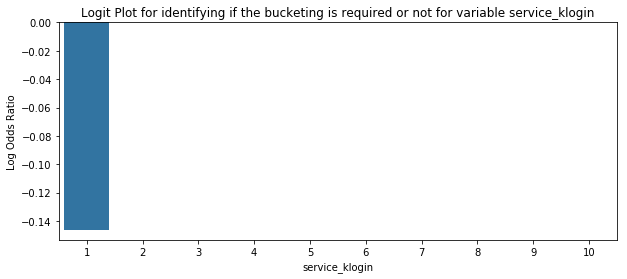

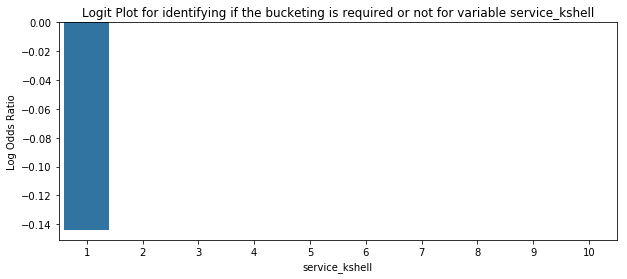

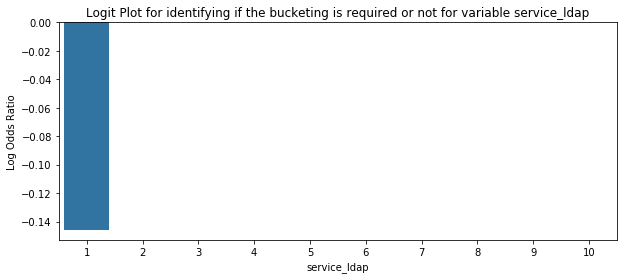

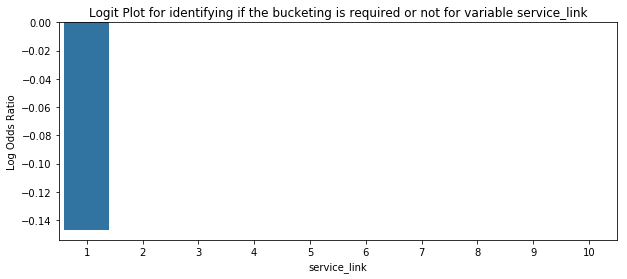

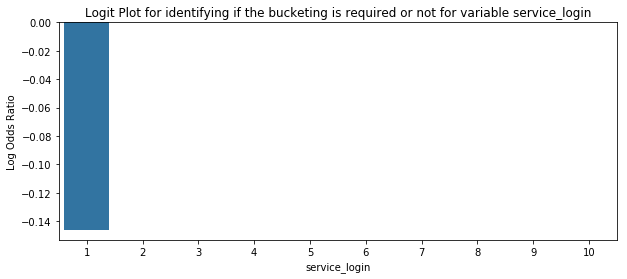

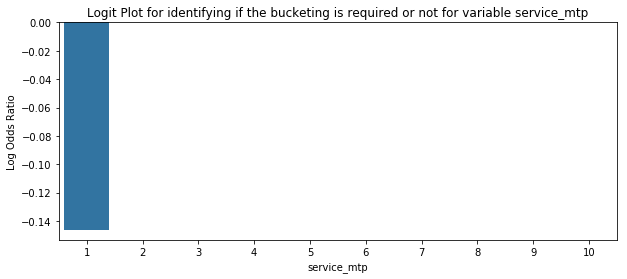

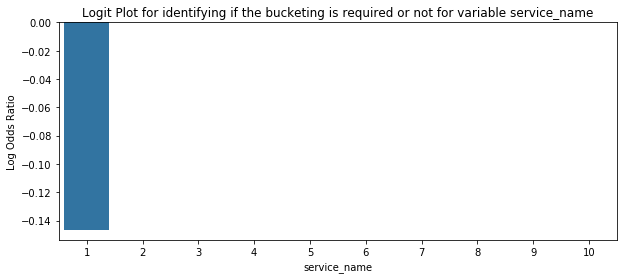

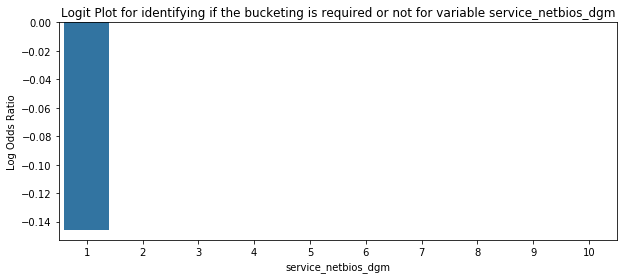

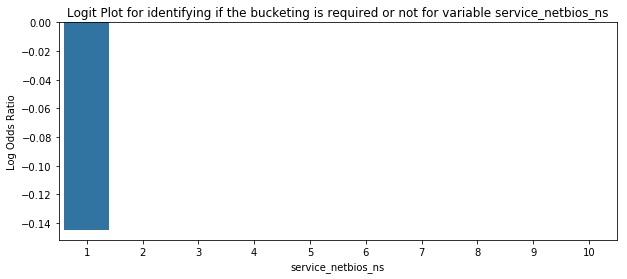

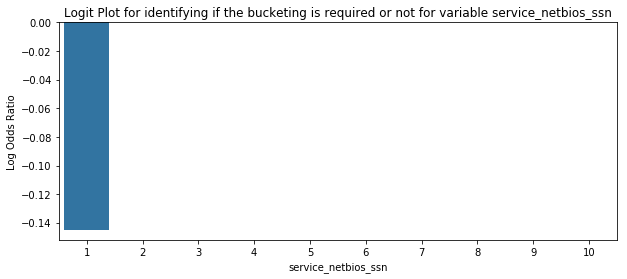

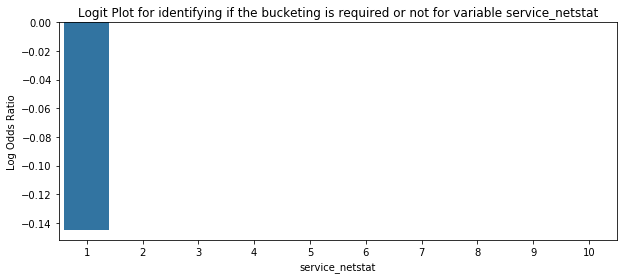

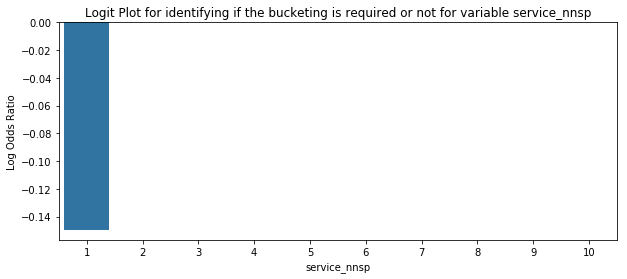

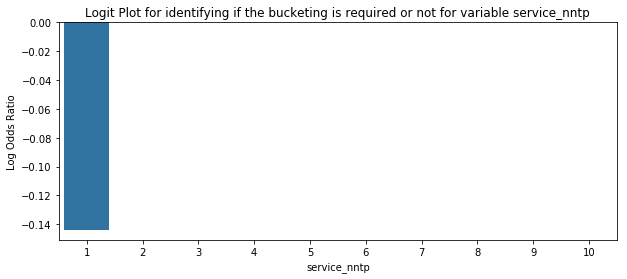

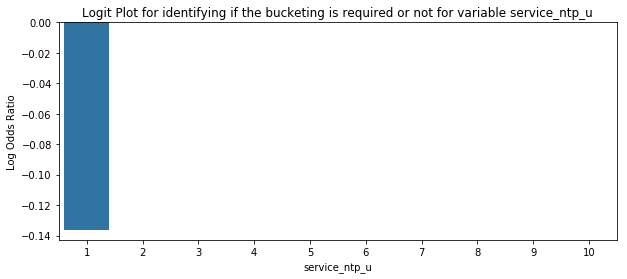

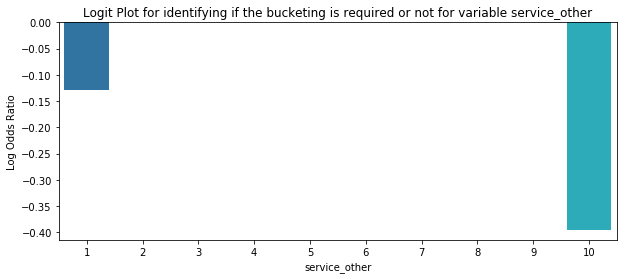

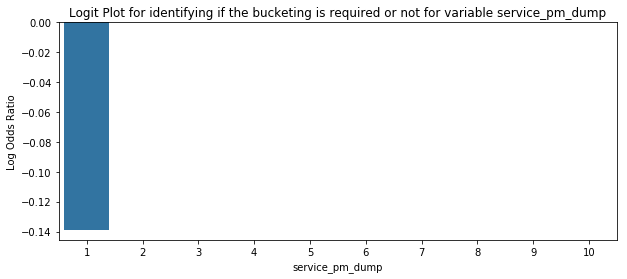

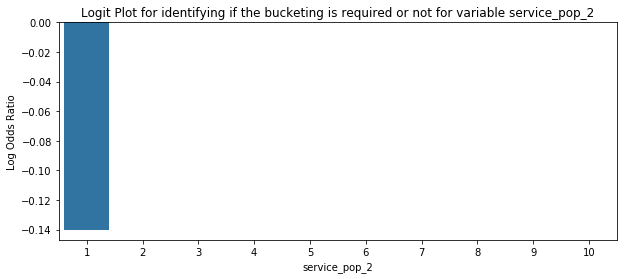

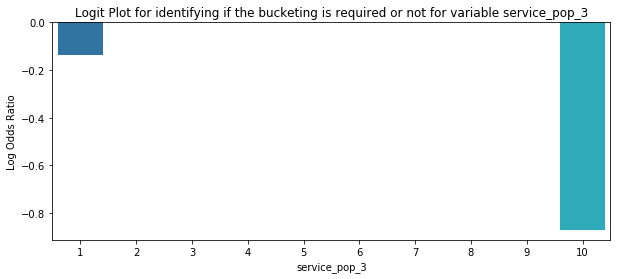

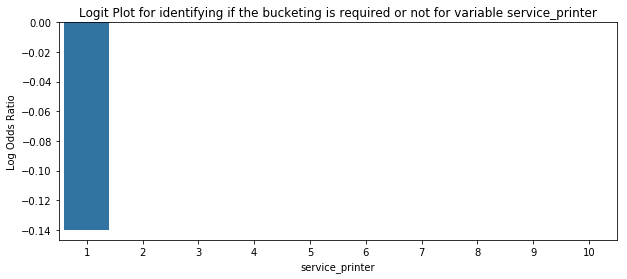

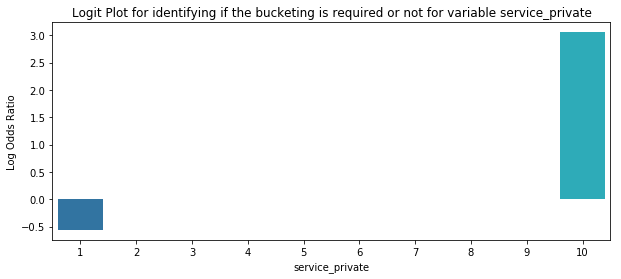

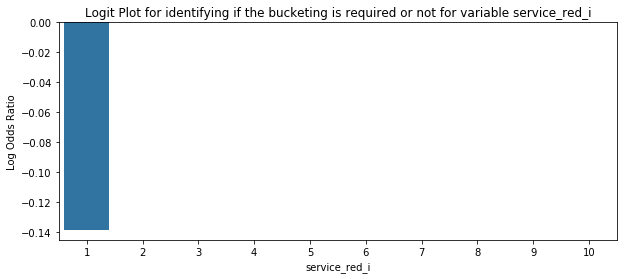

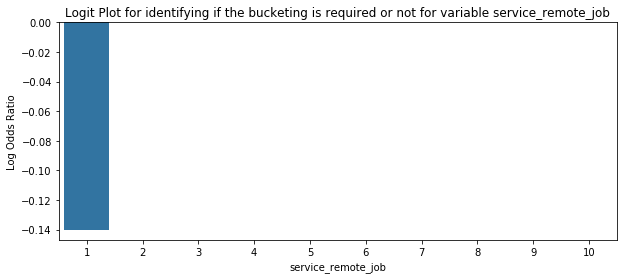

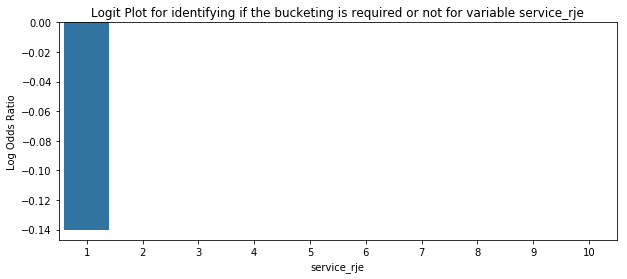

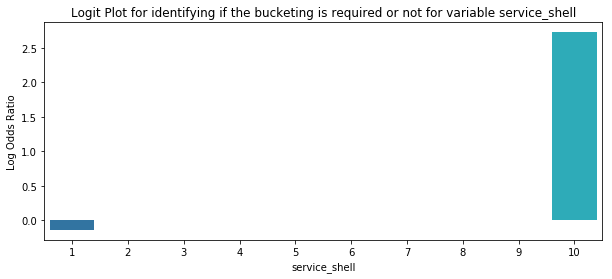

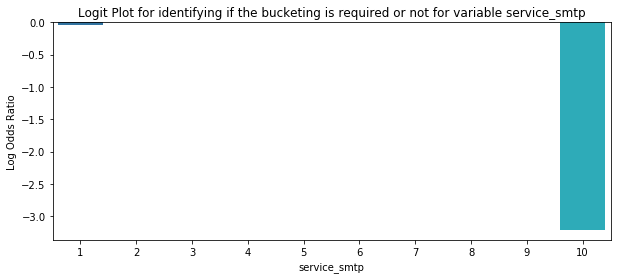

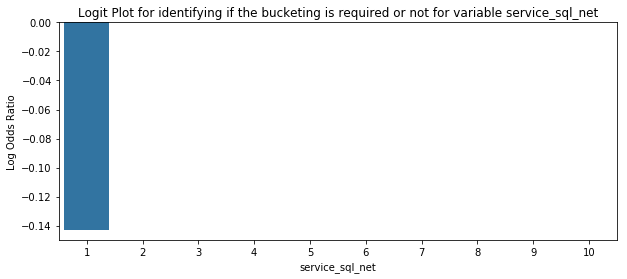

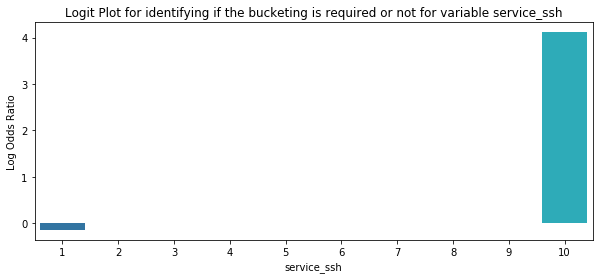

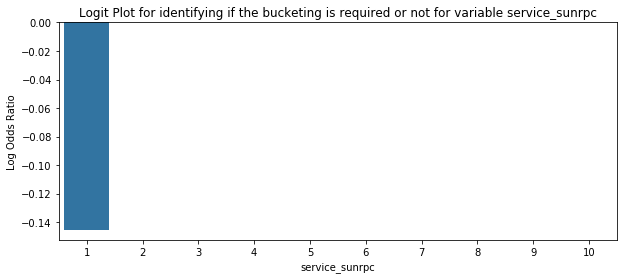

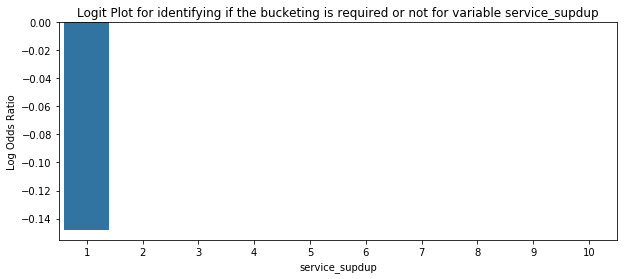

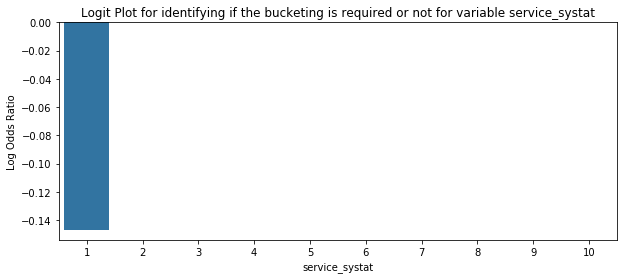

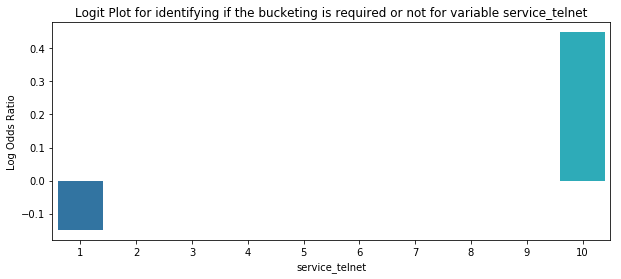

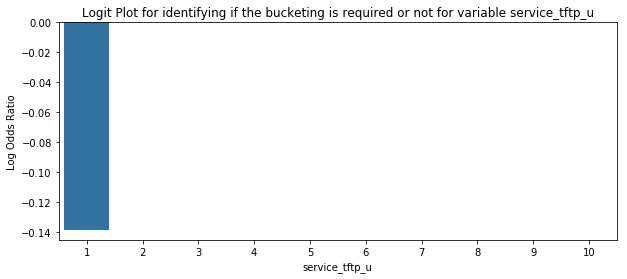

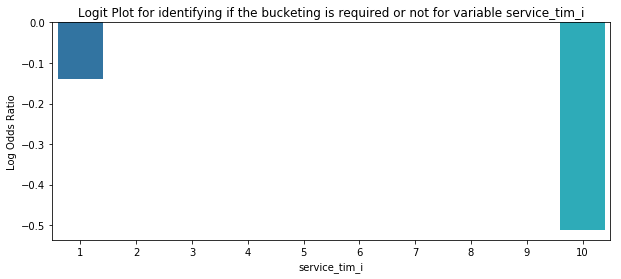

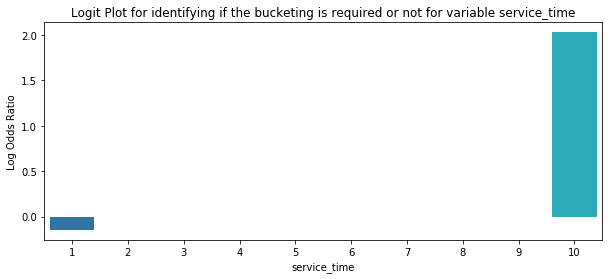

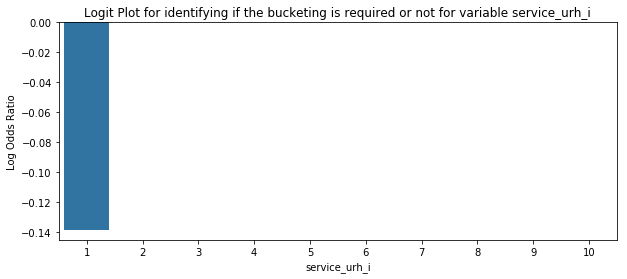

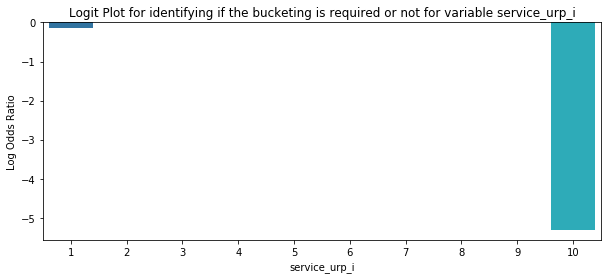

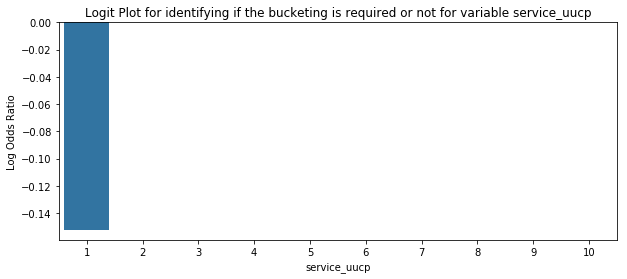

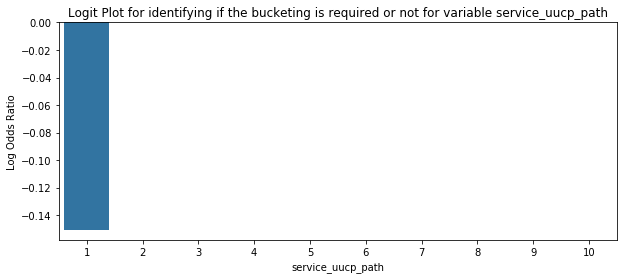

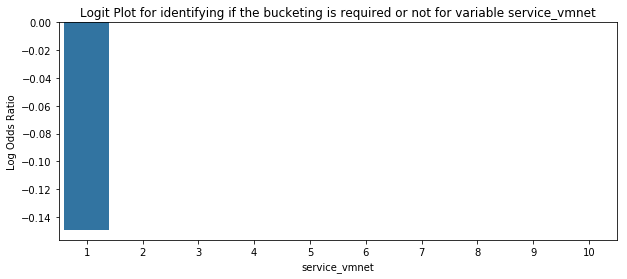

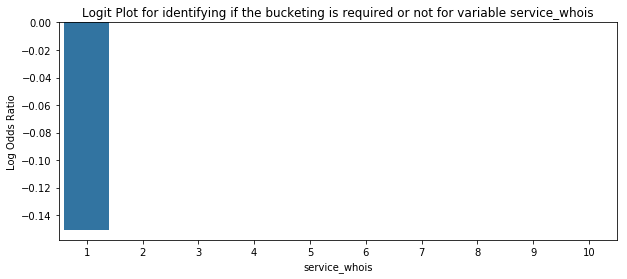

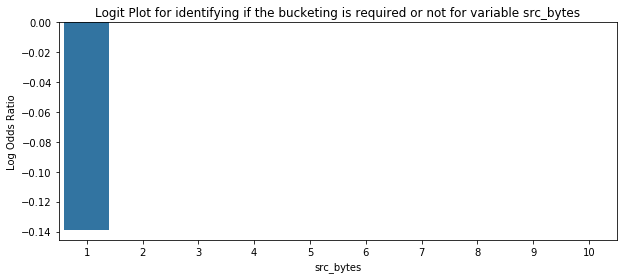

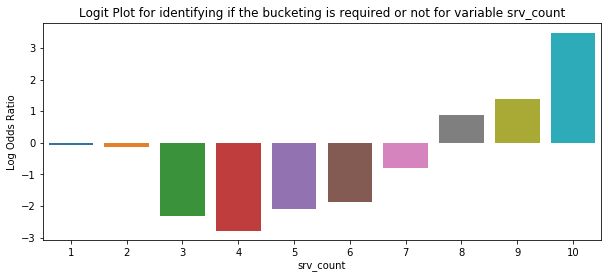

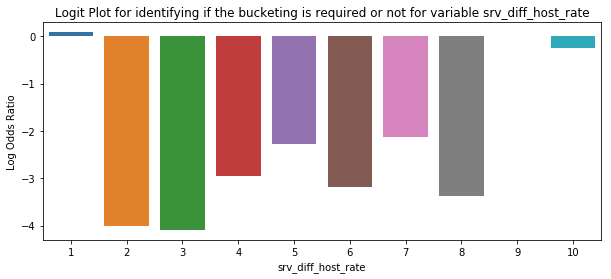

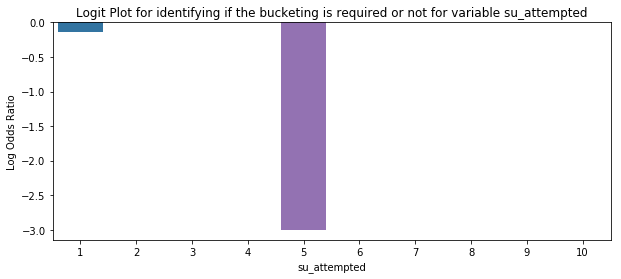

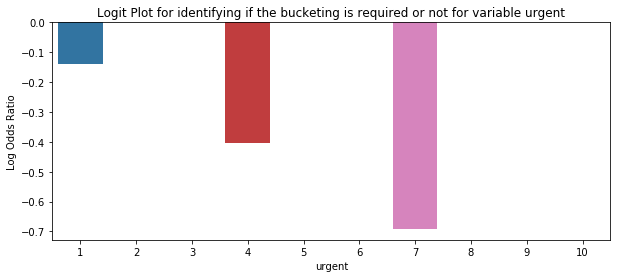

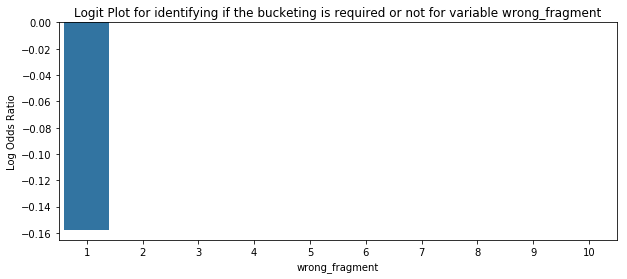

In [1563]:
bp = PdfPages('Transformation Plots.pdf')

for num_variable in data_train_new.columns.difference(['target']): # num-varibale represents the independent variables
    binned = pd.cut(data_train_new[num_variable], bins=10, labels=list(range(1,11)))
    #binned = binned.dropna()
    odds = data_train_new.groupby(binned)['target'].sum() / (data_train_new.groupby(binned)['target'].count()-data_train_new.groupby(binned)['target'].sum())
#   odds = P(Y = 1)/ P(Y = 0) => P(Y =1) / 1 - P(Y = 0)    
    log_odds = np.log(odds)
    fig,axes = plt.subplots(figsize=(10,4))
    sns.barplot(x=log_odds.index,y=log_odds)
    plt.ylabel('Log Odds Ratio')
    plt.title(str('Logit Plot for identifying if the bucketing is required or not for variable ') + str(num_variable))
    bp.savefig(fig)

bp.close()

In [1564]:
data_train_new.columns.size

113

#### Variable Reduction using Somer's D values 

In [313]:
data_train_new.columns

Index(['protocol_type_tcp', 'protocol_type_udp', 'service_X11',
       'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp',
       'service_courier', 'service_csnet_ns', 'service_ctf',
       ...
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'last_flag', 'target'],
      dtype='object', length=113)

In [314]:
import statsmodels.formula.api as sm
logreg_model = sm.logit('target ~ serror_rate', data= data_train_new).fit() # Univariate Regression (one Y and one X variable)

Optimization terminated successfully.
         Current function value: 0.437155
         Iterations 8


In [315]:
p = logreg_model.predict(data_train_new)

In [316]:
metrics.roc_auc_score(data_train_new['target'], p) # Calculating AUC using metrics from sklearn
                                                        # Calculating roc_auc_score for predicted values

0.8062046272697208

In [317]:
2*metrics.roc_auc_score(data_train_new['target'], p)-1  # Somerce D = (2 * AUC - 1)

0.6124092545394415

In [318]:
# User defined way of Calculating Somerce D for all independent variables

somersd_df = pd.DataFrame()  
for num_variable in data_train_new.columns.difference(['target']):
    logreg = sm.logit(formula = str('target ~ ')+str(num_variable), data=data_train_new)
    result = logreg.fit()
    #summ = result.summary2()
    y_score = pd.DataFrame(result.predict())
    y_score.columns = ['Score']   # ????
    somers_d = 2*metrics.roc_auc_score(data_train_new['target'],y_score) - 1
    temp = pd.DataFrame([num_variable,somers_d]).T
    # temp1 = pd.DataFrame([num_variable,somers_d]).T
    temp.columns = ['Variable Name', 'SomersD']
    somersd_df = pd.concat([somersd_df, temp], axis=0)

somersd_df

Optimization terminated successfully.
         Current function value: 0.474707
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.666611
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.690741
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.615406
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.656414
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.686483
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.421391
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.380619
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.688793
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.689516
  

C:\Users\Akhtar\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.433831
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.689106
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.690350
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.690615
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.366053
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.689201
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.690667
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.689943
         Iterations 5
         Current function value: 0.690748
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.690727
         Iterations 5


C:\Users\Akhtar\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.596032
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.410201
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.689272
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.690458
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.690746
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.690326
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.690704
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.689334
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.664989
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.657051
 

C:\Users\Akhtar\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.690741
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.689444
         Iterations 5


C:\Users\Akhtar\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.686424
         Iterations: 35


C:\Users\Akhtar\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.686277
         Iterations: 35


C:\Users\Akhtar\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.687434
         Iterations: 35


C:\Users\Akhtar\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.687324
         Iterations: 35


C:\Users\Akhtar\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.687580
         Iterations: 35


C:\Users\Akhtar\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.687476
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.688439
         Iterations 7


C:\Users\Akhtar\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.643951
         Iterations 11
         Current function value: 0.688112
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.675444
         Iterations 6


C:\Users\Akhtar\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.677667
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.687800
         Iterations 21


LinAlgError: Singular matrix

In [319]:
somersd_df.sort_values(by='SomersD', ascending=False)

,Variable Name,SomersD
0,dst_host_srv_count,0.784955
0,same_srv_rate,0.747816
0,flag_SF,0.744313
0,dst_host_same_srv_rate,0.730696
0,diff_srv_rate,0.689472
0,logged_in,0.676619
0,dst_host_diff_srv_rate,0.653356
0,count,0.64161
0,serror_rate,0.612409
0,flag_S0,0.583128


#### We will be applying logit model building ,predict the values , find out the roc_auc_score for every variable and
#### calculate the Somers D values for each variable.

### Select KBest

In [692]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

In [1565]:
X = data_train_new[data_train_new.columns.difference(['target'])]  # Independent variables
X_new = SelectKBest(f_classif, k=40).fit(X, data_train_new[['target']] ) 

C:\Users\Akhtar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [1566]:
X_new.get_support()

array([ True,  True, False,  True,  True,  True,  True,  True, False,
       False,  True,  True, False,  True,  True, False, False, False,
        True, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False,  True,  True, False,  True,
        True, False,  True, False, False,  True,  True,  True,  True,
       False, False, False,  True, False,  True,  True, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False, False,  True,  True,  True,  True, False, False,
        True, False, False,  True])

In [1567]:
X_new.scores_

array([6.26896775e+04, 5.45104214e+03, 2.13576048e+00, 2.06201012e+04,
       7.89820523e+03, 1.08582416e+03, 1.16917277e+05, 1.37598286e+05,
       4.91346735e+02, 3.00527267e+02, 4.46159944e+03, 9.96512343e+02,
       1.18513146e+02, 2.27187933e+03, 9.22617741e+04, 3.04597014e+02,
       8.28004865e+01, 2.90252349e+01, 1.68332132e+05, 3.04118462e+02,
       2.15668696e+01, 1.94653654e+02, 8.70616690e-01, 6.51392119e+00,
       2.12218790e+04, 1.14585761e+05, 1.69902604e+02, 1.31030882e+01,
       1.77628923e+00, 5.70206131e+01, 1.13029727e+01, 3.56547671e+02,
       6.23608544e+03, 8.64361750e+03, 5.18580951e+01, 1.63866577e+05,
       9.24815048e+04, 4.31288185e+01, 1.00485986e+03, 2.29726175e+00,
       3.20412385e+02, 8.25496735e+02, 8.53754616e+02, 6.31855941e+02,
       6.52926913e+02, 6.03781617e+02, 6.23665200e+02, 5.04741759e+02,
       9.05239880e+03, 5.02206303e+02, 3.57329609e+03, 2.89936873e+03,
       5.61713586e+02, 5.48869854e+02, 3.69465505e+02, 8.98024320e-01,
      

In [1568]:
# summarize the selection of the attributes
import itertools
feature_map = [(i, v) for i, v in itertools.zip_longest(X.columns, X_new.get_support())]

feature_map

#Alternative of capturing the important variables
KBest_features=X.columns[X_new.get_support()]

selected_features_from_KBest = X[KBest_features]

In [1569]:
KBest_features

Index(['count', 'diff_srv_rate', 'dst_host_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_same_srv_rate',
       'dst_host_srv_count', 'flag_REJ', 'flag_RSTO', 'flag_RSTR', 'flag_S0',
       'flag_SF', 'last_flag', 'logged_in', 'protocol_type_udp', 'rerror_rate',
       'same_srv_rate', 'serror_rate', 'service_Z39_50', 'service_bgp',
       'service_courier', 'service_csnet_ns', 'service_ctf',
       'service_domain_u', 'service_eco_i', 'service_ecr_i',
       'service_ftp_data', 'service_http', 'service_imap4', 'service_iso_tsap',
       'service_nnsp', 'service_private', 'service_smtp', 'service_supdup',
       'service_uucp', 'service_uucp_path', 'service_vmnet', 'service_whois',
       'srv_diff_host_rate', 'wrong_fragment'],
      dtype='object')

In [390]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X = data_train_new[data_train_new.columns.difference(['target'])]
logreg = LogisticRegression()
rfe = RFE(logreg, 25)  
rfe = rfe.fit(X, data_train_new[['target']] )
print(rfe.support_)

C:\Users\Akhtar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akhtar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Akhtar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Akhtar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Akhtar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver w

C:\Users\Akhtar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Akhtar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Akhtar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Akhtar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Akhtar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Akhtar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Akhtar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Akhtar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Akhtar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Akhtar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

[False  True False False  True  True False False False False False False
 False False  True  True  True False False False False  True False False
 False  True False False False False False False False  True False  True
  True False False False False False False False False  True  True False
 False  True  True  True False False False False False  True False False
 False False False False  True False False False False False False False
 False False False False  True False  True False False False False False
 False  True False False False False False False False False False  True
 False False False False False False  True False False  True False False
 False False False  True]


In [391]:
# summarize the selection of the attributes
import itertools
feature_map = [(i, v) for i, v in itertools.zip_longest(X.columns, rfe.get_support())]

feature_map

#Alternative of capturing the important variables
RFE_features=X.columns[rfe.get_support()]

selected_features_from_rfe = X[RFE_features]

In [392]:
RFE_features

Index(['diff_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'flag_S0', 'flag_S1', 'flag_S2',
       'is_guest_login', 'logged_in', 'rerror_rate', 'same_srv_rate',
       'serror_rate', 'service_daytime', 'service_discard', 'service_echo',
       'service_eco_i', 'service_ecr_i', 'service_gopher', 'service_imap4',
       'service_netstat', 'service_nntp', 'service_private', 'service_systat',
       'service_uucp', 'service_whois', 'wrong_fragment'],
      dtype='object')

In [49]:
# When chosen k=40 in select k best
features = ['count', 'diff_srv_rate', 'dst_host_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_same_srv_rate',
       'dst_host_srv_count', 'flag_REJ', 'flag_RSTO', 'flag_RSTR', 'flag_S0',
       'flag_SF', 'last_flag', 'logged_in', 'protocol_type_udp', 'rerror_rate',
       'same_srv_rate', 'serror_rate', 'service_Z39_50', 'service_bgp',
       'service_courier', 'service_csnet_ns', 'service_ctf',
       'service_domain_u', 'service_eco_i', 'service_ecr_i',
       'service_ftp_data', 'service_http', 'service_imap4', 'service_iso_tsap',
       'service_nnsp', 'service_private', 'service_smtp', 'service_supdup',
       'service_uucp', 'service_uucp_path', 'service_vmnet', 'service_whois',
       'srv_diff_host_rate', 'wrong_fragment']

In [50]:
features = "+".join(features)

In [51]:
features

'count+diff_srv_rate+dst_host_count+dst_host_diff_srv_rate+dst_host_same_src_port_rate+dst_host_same_srv_rate+dst_host_srv_count+flag_REJ+flag_RSTO+flag_RSTR+flag_S0+flag_SF+last_flag+logged_in+protocol_type_udp+rerror_rate+same_srv_rate+serror_rate+service_Z39_50+service_bgp+service_courier+service_csnet_ns+service_ctf+service_domain_u+service_eco_i+service_ecr_i+service_ftp_data+service_http+service_imap4+service_iso_tsap+service_nnsp+service_private+service_smtp+service_supdup+service_uucp+service_uucp_path+service_vmnet+service_whois+srv_diff_host_rate+wrong_fragment'

#### Variance Inflation Factor Assessment

In [1573]:
X = pd.concat([data_train_new[data_train_new.columns.difference(['target'])],data_train_new['target']], axis=1)
X.head()

,count,diff_srv_rate,dst_bytes,dst_host_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_srv_count,dst_host_srv_diff_host_rate,duration,...,service_uucp_path,service_vmnet,service_whois,src_bytes,srv_count,srv_diff_host_rate,su_attempted,urgent,wrong_fragment,target
0,2,0.00,0,150,0.03,0.17,0.17,25,0.00,0,...,0,0,0,491,2,0.00,0,0,0,0
1,13,0.15,0,255,0.60,0.88,0.00,1,0.00,0,...,0,0,0,146,1,0.00,0,0,0,0
2,123,0.07,0,255,0.05,0.00,0.10,26,0.00,0,...,0,0,0,0,6,0.00,0,0,0,1
3,5,0.00,8153,30,0.00,0.03,1.00,255,0.04,0,...,0,0,0,232,5,0.00,0,0,0,0
4,30,0.00,420,255,0.00,0.00,1.00,255,0.00,0,...,0,0,0,199,32,0.09,0,0,0,0


In [1574]:
features

'count+diff_srv_rate+dst_host_count+dst_host_diff_srv_rate+dst_host_same_src_port_rate+dst_host_same_srv_rate+dst_host_srv_count+flag_REJ+flag_RSTO+flag_RSTR+flag_S0+flag_SF+last_flag+logged_in+protocol_type_udp+rerror_rate+same_srv_rate+serror_rate+service_Z39_50+service_bgp+service_courier+service_csnet_ns+service_ctf+service_domain_u+service_eco_i+service_ecr_i+service_ftp_data+service_http+service_imap4+service_iso_tsap+service_nnsp+service_private+service_smtp+service_supdup+service_uucp+service_uucp_path+service_vmnet+service_whois+srv_diff_host_rate+wrong_fragment'

In [1575]:
a,b = dmatrices(formula_like='target ~ ' + 'count+diff_srv_rate+dst_host_count+dst_host_diff_srv_rate+dst_host_same_src_port_rate+dst_host_srv_count+flag_REJ+flag_RSTO+flag_RSTR+last_flag+logged_in+protocol_type_udp+service_Z39_50+service_bgp+service_courier+service_csnet_ns+service_ctf+service_domain_u+service_eco_i+service_ecr_i+service_ftp_data+service_imap4+service_iso_tsap+service_nnsp+service_private+service_smtp+service_supdup+service_uucp+service_uucp_path+service_vmnet+service_whois+srv_diff_host_rate+wrong_fragment' , data = X, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif["features"] = b.columns

vif 

,VIF Factor,features
0,113.027483,Intercept
1,2.280433,count
2,1.515577,diff_srv_rate
3,1.823501,dst_host_count
4,2.042982,dst_host_diff_srv_rate
5,2.978487,dst_host_same_src_port_rate
6,3.442361,dst_host_srv_count
7,1.397046,flag_REJ
8,1.061857,flag_RSTO
9,1.542908,flag_RSTR


In [1576]:
vif.to_excel("VIF-Binary.xlsx")

In [48]:
list_vars = ['count',
 'diff_srv_rate',
 'dst_host_count',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_count',
 'flag_REJ',
 'flag_RSTO',
 'flag_RSTR',
 'last_flag',
 'logged_in',
 'protocol_type_udp',
 'service_Z39_50',
 'service_bgp',
 'service_courier',
 'service_csnet_ns',
 'service_ctf',
 'service_domain_u',
 'service_eco_i',
 'service_ecr_i',
 'service_ftp_data',
 'service_imap4',
 'service_iso_tsap',
 'service_nnsp',
 'service_private',
 'service_smtp',
 'service_supdup',
 'service_uucp',
 'service_uucp_path',
 'service_vmnet',
 'service_whois',
 'srv_diff_host_rate',
 'wrong_fragment']

In [49]:
list_vars

['count',
 'diff_srv_rate',
 'dst_host_count',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_count',
 'flag_REJ',
 'flag_RSTO',
 'flag_RSTR',
 'last_flag',
 'logged_in',
 'protocol_type_udp',
 'service_Z39_50',
 'service_bgp',
 'service_courier',
 'service_csnet_ns',
 'service_ctf',
 'service_domain_u',
 'service_eco_i',
 'service_ecr_i',
 'service_ftp_data',
 'service_imap4',
 'service_iso_tsap',
 'service_nnsp',
 'service_private',
 'service_smtp',
 'service_supdup',
 'service_uucp',
 'service_uucp_path',
 'service_vmnet',
 'service_whois',
 'srv_diff_host_rate',
 'wrong_fragment']

In [50]:
data_dev = data_train_new[list_vars]

In [51]:
data_dev.head()

,count,diff_srv_rate,dst_host_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_count,flag_REJ,flag_RSTO,flag_RSTR,last_flag,...,service_nnsp,service_private,service_smtp,service_supdup,service_uucp,service_uucp_path,service_vmnet,service_whois,srv_diff_host_rate,wrong_fragment
0,2,0.00,150,0.03,0.17,25,0,0,0,20,...,0,0,0,0,0,0,0,0,0.00,0
1,13,0.15,255,0.60,0.88,1,0,0,0,15,...,0,0,0,0,0,0,0,0,0.00,0
2,123,0.07,255,0.05,0.00,26,0,0,0,19,...,0,1,0,0,0,0,0,0,0.00,0
3,5,0.00,30,0.00,0.03,255,0,0,0,21,...,0,0,0,0,0,0,0,0,0.00,0
4,30,0.00,255,0.00,0.00,255,0,0,0,21,...,0,0,0,0,0,0,0,0,0.09,0


### Using Oversampling Technique (SMOTE) to sample the minority class which is target = 1 .
### THere was no need as such but Better accuracy value is given after Oversampling

In [52]:
from imblearn.over_sampling import SMOTE
# Resample the minority class. You can change the strategy to 'auto' if you are not sure.
sm = SMOTE(sampling_strategy='minority', random_state=51)

In [53]:
# Fit the model to generate the data.
oversampled_trainX, oversampled_trainY = sm.fit_sample(data_dev, data_train['target'])

In [54]:
oversampled_trainX.shape

(134686, 33)

In [55]:
oversampled_trainY.shape

(134686,)

In [56]:
train_X = pd.DataFrame(oversampled_trainX)

In [57]:
train_X.columns = data_dev.columns

In [58]:
train_X.head()

,count,diff_srv_rate,dst_host_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_count,flag_REJ,flag_RSTO,flag_RSTR,last_flag,...,service_nnsp,service_private,service_smtp,service_supdup,service_uucp,service_uucp_path,service_vmnet,service_whois,srv_diff_host_rate,wrong_fragment
0,2.0,0.00,150.0,0.03,0.17,25.0,0.0,0.0,0.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
1,13.0,0.15,255.0,0.60,0.88,1.0,0.0,0.0,0.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
2,123.0,0.07,255.0,0.05,0.00,26.0,0.0,0.0,0.0,19.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
3,5.0,0.00,30.0,0.00,0.03,255.0,0.0,0.0,0.0,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
4,30.0,0.00,255.0,0.00,0.00,255.0,0.0,0.0,0.0,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.09,0.0


In [59]:
train_y = pd.Series(oversampled_trainY)

In [60]:
train_y.value_counts()

1    67343
0    67343
dtype: int64

In [63]:
oversampled_train_new = pd.concat([train_X,train_y],axis=1)

In [64]:
oversampled_train_new.shape

(134686, 34)

In [68]:
oversampled_train_new.rename(columns={0:'target'},inplace=True)

In [72]:
oversampled_train_new.target.value_counts()

1    67343
0    67343
Name: target, dtype: int64

### MOdel BUilding

In [61]:
import statsmodels.formula.api as smf

In [114]:
logreg = smf.logit(formula='target~count+diff_srv_rate+dst_host_count+dst_host_diff_srv_rate+dst_host_same_src_port_rate+dst_host_srv_count+flag_REJ+flag_RSTR+last_flag+logged_in+protocol_type_udp+service_domain_u+service_eco_i+service_ecr_i+service_ftp_data+service_private+service_smtp+srv_diff_host_rate+wrong_fragment',data = oversampled_train_new)

In [115]:
result = logreg.fit(method='bfgs')

         Current function value: 0.096211
         Iterations: 35
         Function evaluations: 41
         Gradient evaluations: 41


C:\Users\Akhtar\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [288]:
results = print(result.summary2())

                               Results: Logit
Model:                   Logit               Pseudo R-squared:    0.861     
Dependent Variable:      target              AIC:                 25956.4523
Date:                    2019-05-11 17:45    BIC:                 26152.6664
No. Observations:        134686              Log-Likelihood:      -12958.   
Df Model:                19                  LL-Null:             -93357.   
Df Residuals:            134666              LLR p-value:         0.0000    
Converged:               0.0000              Scale:               1.0000    
----------------------------------------------------------------------------
                             Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------------
Intercept                    6.3143   0.1237  51.0441 0.0000  6.0719  6.5568
count                        0.0330   0.0006  53.3389 0.0000  0.0318  0.0342
diff_srv_rate               -0

In [291]:
f = open('Modeloutput.csv','w')
f.write(result.summary().as_csv())
f.close()

In [117]:
list_vars2 = ['count','diff_srv_rate','dst_host_count','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_count','flag_REJ','flag_RSTR','last_flag','logged_in','protocol_type_udp','service_domain_u','service_eco_i','service_ecr_i','service_ftp_data','service_private','service_smtp','srv_diff_host_rate','wrong_fragment']

In [118]:
train_X = oversampled_train_new[list_vars2]

In [337]:
data_train_model.shape

(125973, 34)

In [338]:
train_X = data_train_model[list_vars3]

In [339]:
train_X.shape

(125973, 22)

In [340]:
train_y = data_train_model.target

In [341]:
train_y.shape

(125973,)

In [293]:
corr_model = pd.concat([train_X,train_y],axis=1)

In [295]:
corr1 = corr_model.corr()

In [297]:
corr1.to_excel("FinalMOdelCorr-Binary.xlsx")

In [123]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

kfold = model_selection.KFold(n_splits=10, random_state=7)

modelCV = LogisticRegression()
scoring = 'recall'
results = model_selection.cross_val_score(modelCV, train_X, train_y, cv=kfold, scoring=scoring)
print("10-fold cross validation average Recall: %.3f" % (results.mean()))

C:\Users\Akhtar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Akhtar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Akhtar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Akhtar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Akhtar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

10-fold cross validation average Recall: 0.981


In [124]:
results

array([0.97971152, 0.97996795, 0.98248632, 0.97767221, 0.98101468,
       0.97991903, 0.98514931, 0.98045137, 0.98061519, 0.97983871])

In [125]:
logreg = LogisticRegression()
results =logreg.fit(train_X, train_y)

C:\Users\Akhtar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [126]:
results.coef_

array([[ 0.02030026, -1.08136763,  0.00878297,  0.88755745,  1.45677875,
        -0.01059159, -0.85038773,  0.2977397 , -0.61822308, -2.95750374,
        -6.5315079 , -3.28505473,  0.30073182, -0.42017095, -1.17062841,
         5.64175522, -2.11211473,  1.98066968,  1.52459734]])

In [158]:
from sklearn import metrics
metrics.roc_auc_score(train_y,results.predict(train_X))

0.9728776561780734

In [159]:
metrics.roc_auc_score(train_y,pd.DataFrame(results.predict_proba(train_X))[1])
#metrics.roc_auc_score(train_y,pd.DataFrame(xgb_estimator.predict_proba(train_X))[1])

0.9947132884412986

In [160]:
metrics.recall_score(train_y,results.predict(train_X))

0.9809779784090403

In [161]:
print(metrics.classification_report(train_y,results.predict(train_X)))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     67343
           1       0.97      0.98      0.97     67343

   micro avg       0.97      0.97      0.97    134686
   macro avg       0.97      0.97      0.97    134686
weighted avg       0.97      0.97      0.97    134686



In [162]:
metrics.roc_auc_score(test_y,results.predict(test_X))

0.8791932440935061

In [163]:
metrics.recall_score(test_y,results.predict(test_X))

0.8485934699602588

In [164]:
print(metrics.classification_report(test_y,results.predict(test_X)))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      9711
           1       0.93      0.85      0.89     12833

   micro avg       0.87      0.87      0.87     22544
   macro avg       0.87      0.88      0.87     22544
weighted avg       0.88      0.87      0.88     22544



### XGBoost

In [165]:
from xgboost import XGBClassifier

In [166]:
#All Columns
xgb_estimator = XGBClassifier(n_estimators=300,
                         random_state = 42,
                        n_jobs=-1,
                        verbose=1)

In [167]:
xgb_estimator.fit(train_X, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1, verbose=1)

In [168]:
xgb_estimator.predict(train_X)

array([0, 1, 1, ..., 1, 1, 1])

In [169]:
metrics.roc_auc_score(train_y,xgb_estimator.predict(train_X))

0.9963173603789556

In [170]:
metrics.roc_auc_score(test_y,xgb_estimator.predict(test_X))

0.8783610426095586

In [171]:
print(metrics.classification_report(train_y, xgb_estimator.predict(train_X)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     67343
           1       1.00      1.00      1.00     67343

   micro avg       1.00      1.00      1.00    134686
   macro avg       1.00      1.00      1.00    134686
weighted avg       1.00      1.00      1.00    134686



In [172]:
print(metrics.classification_report(test_y, xgb_estimator.predict(test_X)))

              precision    recall  f1-score   support

           0       0.78      0.97      0.86      9711
           1       0.97      0.79      0.87     12833

   micro avg       0.87      0.87      0.87     22544
   macro avg       0.87      0.88      0.87     22544
weighted avg       0.89      0.87      0.87     22544



#### Tuning the Parameters

In [173]:
xgb_estimator = XGBClassifier( learning_rate=0.01,
                               n_estimators=300,
                               max_depth=3,
                               min_child_weight=1,
                               gamma=1,
                               subsample=0.8,
                               colsample_bytree=0.8,
                               n_jobs=-1,
                               reg_alpa=1,
                               scale_pos_weight=1,
                               random_state=42,
                               verbose=1)

In [174]:
xgb_estimator.fit(train_X,train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpa=1, reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=None, silent=True, subsample=0.8,
       verbose=1)

### ROC_AUC 98 and 88

In [354]:
print(metrics.roc_auc_score(train_y,pd.DataFrame(xgb_estimator.predict(train_X))))

0.9841329743860762


In [355]:
print(metrics.roc_auc_score(test_y,pd.DataFrame(xgb_estimator.predict(test_X))))

0.8798041109565709


In [356]:
metrics.recall_score(test_y,xgb_estimator.predict(test_X))

0.849918179692979

In [357]:
metrics.recall_score(train_y,xgb_estimator.predict(train_X))

0.9934504519870373

In [358]:
print(metrics.classification_report(train_y, xgb_estimator.predict(train_X)))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     67343
           1       0.97      0.99      0.98     58630

   micro avg       0.98      0.98      0.98    125973
   macro avg       0.98      0.98      0.98    125973
weighted avg       0.98      0.98      0.98    125973



In [359]:
print(metrics.classification_report(test_y, xgb_estimator.predict(test_X)))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      9711
           1       0.93      0.85      0.89     12833

   micro avg       0.88      0.88      0.88     22544
   macro avg       0.87      0.88      0.87     22544
weighted avg       0.88      0.88      0.88     22544



In [180]:
metrics.accuracy_score(test_y,xgb_estimator.predict(test_X))

0.8810770049680624

In [181]:
metrics.accuracy_score(train_y,xgb_estimator.predict(train_X))

0.9828267228962179

### Decison TRee

In [182]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export
from sklearn.model_selection import GridSearchCV

In [183]:
clf_tree = DecisionTreeClassifier( max_depth = 5 )
clf_tree=clf_tree.fit( train_X, train_y )

In [184]:
pd.DataFrame(clf_tree.predict_proba(train_X)).head()

,0,1
0,0.993540,0.006460
1,0.001897,0.998103
2,0.001897,0.998103
3,0.993540,0.006460
4,0.993540,0.006460


In [185]:
pd.DataFrame(clf_tree.predict_proba(train_X))[1]

0         0.006460
1         0.998103
2         0.998103
3         0.006460
4         0.006460
5         0.998103
6         0.998103
7         0.998103
8         0.998103
9         0.998103
10        0.998103
11        0.998103
12        0.006460
13        0.803315
14        0.998103
15        0.998103
16        0.006460
17        0.728590
18        0.006460
19        0.006460
20        0.998103
21        0.998103
22        0.006460
23        0.006460
24        0.998103
25        0.006460
26        0.998103
27        0.006460
28        0.006460
29        0.006460
            ...   
134656    0.998103
134657    0.998103
134658    0.998103
134659    0.998103
134660    0.998103
134661    0.998103
134662    0.623721
134663    0.803315
134664    0.998103
134665    0.998103
134666    0.998103
134667    0.998103
134668    0.998103
134669    0.998103
134670    0.980091
134671    0.998103
134672    0.980091
134673    1.000000
134674    0.980091
134675    0.998103
134676    0.998103
134677    0.

In [186]:
pred = pd.DataFrame(clf_tree.predict( train_X ), index=train_X.index)

In [187]:
tree_train_pred = pd.concat([train_y, pred], axis=1)

In [188]:
tree_train_pred.columns = ['actual', 'predicted']

In [189]:
tree_train_pred.head()

,actual,predicted
0,0,0
1,0,1
2,1,1
3,0,0
4,0,0


In [190]:
pred_test = pd.DataFrame(clf_tree.predict( test_X ), index=test_X.index)
tree_test_pred = pd.concat([test_y, pred_test], axis=1)
tree_test_pred.columns = ['actual', 'predicted']
tree_test_pred.head()

,actual,predicted
0,1,1
1,1,1
2,0,0
3,1,1
4,1,1


Text(0.5, 15.0, 'Predicted label')

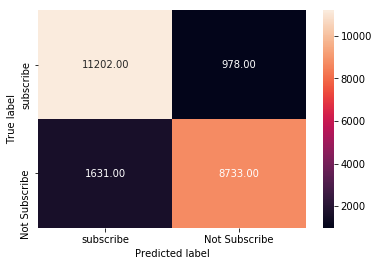

In [191]:
tree_cm = metrics.confusion_matrix( tree_test_pred.predicted,
                                 tree_test_pred.actual,
                                 [1,0] )
sns.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["subscribe", "Not Subscribe"] , yticklabels = ["subscribe", "Not Subscribe"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

In [192]:
#How good the model is?
predict_proba_df = pd.DataFrame( clf_tree.predict_proba( train_X ) )

predict_proba_df.columns= ['P_no', 'P_yes']

predict_proba_df.head()

,P_no,P_yes
0,0.993540,0.006460
1,0.001897,0.998103
2,0.001897,0.998103
3,0.993540,0.006460
4,0.993540,0.006460


In [193]:
metrics.roc_auc_score(train_y,predict_proba_df.P_yes )

0.9949490872767691

In [194]:
param_grid = {'max_depth': np.arange(3, 5),
             'max_features': np.arange(8,20)}

In [195]:
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)
tree.fit( train_X, train_y )

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([3, 4]), 'max_features': array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [196]:
tree.best_params_

{'max_depth': 4, 'max_features': 13}

In [197]:
clf_tree = DecisionTreeClassifier(max_depth = 4, max_features = 13)

In [198]:
clf_tree.fit(train_X,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=13, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [199]:
print(metrics.classification_report(train_y, clf_tree.predict(train_X)))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     67343
           1       0.96      0.96      0.96     67343

   micro avg       0.96      0.96      0.96    134686
   macro avg       0.96      0.96      0.96    134686
weighted avg       0.96      0.96      0.96    134686



In [200]:
print(metrics.classification_report(test_y, clf_tree.predict(test_X)))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84      9711
           1       0.93      0.80      0.86     12833

   micro avg       0.85      0.85      0.85     22544
   macro avg       0.85      0.86      0.85     22544
weighted avg       0.86      0.85      0.85     22544



### ROC_AUC 96 and 86

In [201]:
metrics.roc_auc_score(train_y, clf_tree.predict(train_X))

0.9642353325512675

In [202]:
metrics.roc_auc_score(test_y, clf_tree.predict(test_X))

0.8599475115253805

Text(0.5, 15.0, 'Predicted label')

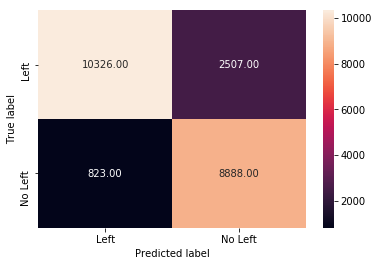

In [203]:
tree_cm = metrics.confusion_matrix( test_y,
                                 clf_tree.predict(test_X),
                                 [1,0] )
sns.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

### Feature Relative Importance

In [204]:
clf_tree.feature_importances_

array([0.05301417, 0.61094257, 0.00087216, 0.00841665, 0.15379321,
       0.00765478, 0.00659638, 0.        , 0.09440127, 0.0070146 ,
       0.        , 0.        , 0.0064431 , 0.        , 0.        ,
       0.03811248, 0.        , 0.01273865, 0.        ])

In [205]:
# summarize the selection of the attributes
import itertools
feature_map = [(i, v) for i, v in itertools.zip_longest(train_X.columns, clf_tree.feature_importances_)]

feature_map

[('count', 0.05301416720815975),
 ('diff_srv_rate', 0.6109425651848804),
 ('dst_host_count', 0.0008721563171920427),
 ('dst_host_diff_srv_rate', 0.008416654176955769),
 ('dst_host_same_src_port_rate', 0.15379320643154176),
 ('dst_host_srv_count', 0.007654782888502159),
 ('flag_REJ', 0.006596375695671756),
 ('flag_RSTR', 0.0),
 ('last_flag', 0.0944012699403744),
 ('logged_in', 0.007014600387598271),
 ('protocol_type_udp', 0.0),
 ('service_domain_u', 0.0),
 ('service_eco_i', 0.006443095521406863),
 ('service_ecr_i', 0.0),
 ('service_ftp_data', 0.0),
 ('service_private', 0.038112479008899525),
 ('service_smtp', 0.0),
 ('srv_diff_host_rate', 0.012738647238817258),
 ('wrong_fragment', 0.0)]

In [206]:
Feature_importance = pd.DataFrame(feature_map, columns=['Feature', 'importance'])
Feature_importance.sort_values('importance', inplace=True, ascending=False)
Feature_importance

,Feature,importance
1,diff_srv_rate,0.610943
4,dst_host_same_src_port_rate,0.153793
8,last_flag,0.094401
0,count,0.053014
15,service_private,0.038112
17,srv_diff_host_rate,0.012739
3,dst_host_diff_srv_rate,0.008417
5,dst_host_srv_count,0.007655
9,logged_in,0.007015
6,flag_REJ,0.006596


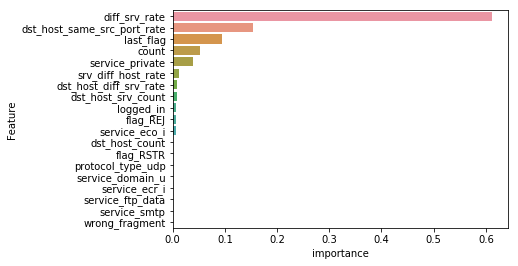

In [207]:
sns.barplot(x = 'importance',y='Feature',data = Feature_importance)

### RAndom Forest 

In [208]:
from sklearn.ensemble import RandomForestClassifier

In [209]:
radm_clf = RandomForestClassifier(oob_score=True,n_estimators=70 , max_features=12, n_jobs=-1)
radm_clf.fit( train_X, train_y )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=12, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [210]:
radm_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': radm_clf.predict( test_X ) } )

metrics.recall_score( radm_test_pred.actual, radm_test_pred.predicted )

0.6742772539546482

#### After Tuning the Parameters, these values are Selected :

In [232]:
rdm_final = RandomForestClassifier(max_depth=4,max_features=12,n_estimators=70,n_jobs=-1,random_state=15)

In [233]:
rdm_final.fit(train_X,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features=12, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=-1,
            oob_score=False, random_state=15, verbose=0, warm_start=False)

In [360]:
rdm_final1 = RandomForestClassifier(max_depth=4,max_features=12,n_estimators=70,n_jobs=-1,random_state=15)

In [361]:
rdm_final1.fit(train_X,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features=12, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=-1,
            oob_score=False, random_state=15, verbose=0, warm_start=False)

### ROC_AUC = 98 and 92

In [215]:
from sklearn import metrics

In [234]:
metrics.roc_auc_score(train_y,rdm_final.predict(train_X))

0.981690747367952

In [235]:
metrics.roc_auc_score(test_y,rdm_final.predict(test_X))

0.9171446208180382

In [236]:
metrics.accuracy_score(test_y,rdm_final.predict(test_X))

0.9126153300212917

In [219]:
print(metrics.classification_report(train_y,rdm_final.predict(train_X)))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     67343
           1       0.98      0.99      0.98     67343

   micro avg       0.98      0.98      0.98    134686
   macro avg       0.98      0.98      0.98    134686
weighted avg       0.98      0.98      0.98    134686



In [220]:
print(metrics.classification_report(test_y,rdm_final.predict(test_X)))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      9711
           1       0.96      0.88      0.92     12833

   micro avg       0.91      0.91      0.91     22544
   macro avg       0.91      0.92      0.91     22544
weighted avg       0.92      0.91      0.91     22544



In [221]:
rdm_final.feature_importances_

indices = np.argsort(rdm_final.feature_importances_)[::-1]

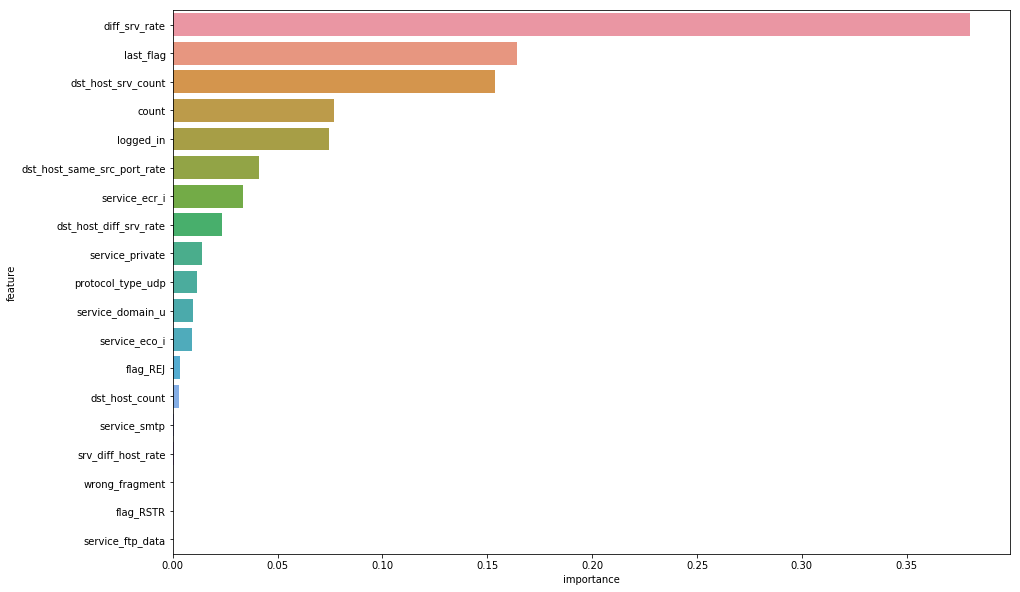

In [222]:
plt.subplots(figsize=(15,10))
indices = np.argsort(rdm_final.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_X.shape[1]):
    feature_rank.loc[f] = [f+1,
                         train_X.columns[indices[f]],
                         rdm_final.feature_importances_[indices[f]]]
sns.barplot( y = 'feature', x = 'importance', data = feature_rank )

In [238]:
train_gini = 2*metrics.roc_auc_score(oversampled_trainY, rdm_final.predict(train_X)) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

test_gini = 2*metrics.roc_auc_score(data_test_new['target'], rdm_final.predict(test_X)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)

The Gini Index for the model built on the Train Data is :  0.9633814947359041
The Gini Index for the model built on the Test Data is :  0.8342892416360763


In [239]:
train_auc = metrics.roc_auc_score(oversampled_trainY, rdm_final.predict(train_X))
test_auc = metrics.roc_auc_score(data_test_new['target'], rdm_final.predict(test_X))

print("The AUC for the model built on the Train Data is : ", train_auc)
print("The AUC for the model built on the Test Data is : ", test_auc)
                                 

The AUC for the model built on the Train Data is :  0.981690747367952
The AUC for the model built on the Test Data is :  0.9171446208180382


In [240]:
pd.DataFrame(rdm_final.predict_proba(train_X))[1]

0         0.084104
1         0.858505
2         0.996690
3         0.012414
4         0.012513
5         0.996690
6         0.996690
7         0.996690
8         0.996690
9         0.996690
10        0.996690
11        0.996690
12        0.012414
13        0.830132
14        0.996690
15        0.996690
16        0.012414
17        0.610762
18        0.012414
19        0.012414
20        0.996690
21        0.995158
22        0.012414
23        0.118316
24        0.996690
25        0.030966
26        0.996690
27        0.012414
28        0.012513
29        0.012513
            ...   
134656    0.996690
134657    0.996690
134658    0.996690
134659    0.996690
134660    0.996690
134661    0.996690
134662    0.815832
134663    0.857541
134664    0.976924
134665    0.996690
134666    0.996690
134667    0.996690
134668    0.996690
134669    0.996690
134670    0.918361
134671    0.996690
134672    0.870786
134673    0.824673
134674    0.870786
134675    0.996690
134676    0.996690
134677    0.

In [241]:
## Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's
train_predicted_prob = pd.DataFrame(rdm_final.predict_proba(train_X))[1]
train_predicted_prob.column = ['prob']
train_actual = train_y
# making a DataFrame with actual and prob columns
train_predict = pd.concat([train_actual, train_predicted_prob], axis=1)
train_predict.columns = ['actual','prob']
train_predict.head()  # train_predict

,actual,prob
0,0,0.084104
1,0,0.858505
2,1,0.996690
3,0,0.012414
4,0,0.012513


In [242]:
## Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's
test_predicted_prob = pd.DataFrame(rdm_final.predict_proba(test_X))[1]
test_predicted_prob.column = ['prob']
test_actual = test_y
# making a DataFrame with actual and prob columns
test_predict = pd.concat([test_actual, test_predicted_prob], axis=1)
test_predict.columns = ['actual','prob']
test_predict.head()  # test_predict

,actual,prob
0,1,0.996690
1,1,0.996690
2,0,0.073416
3,1,0.908145
4,1,0.756490


In [243]:
np.linspace(0,1,50)

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

In [244]:
## Intuition behind ROC curve - confusion matrix for each different cut-off shows trade off in sensitivity and specificity
roc_like_df = pd.DataFrame()
train_temp = train_predict.copy()

for cut_off in np.linspace(0,1,50):
    train_temp['cut_off'] = cut_off
    train_temp['predicted'] = train_temp['prob'].apply(lambda x: 0.0 if x < cut_off else 1.0)
    train_temp['tp'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['fp'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['tn'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==0 else 0.0, axis=1)
    train_temp['fn'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==0 else 0.0, axis=1)
    sensitivity = train_temp['tp'].sum() / (train_temp['tp'].sum() + train_temp['fn'].sum())
    specificity = train_temp['tn'].sum() / (train_temp['tn'].sum() + train_temp['fp'].sum())
    accuracy = (train_temp['tp'].sum()  + train_temp['tn'].sum() ) / (train_temp['tp'].sum() + train_temp['fn'].sum() + train_temp['tn'].sum() + train_temp['fp'].sum())
    roc_like_table = pd.DataFrame([cut_off, sensitivity, specificity, accuracy]).T
    roc_like_table.columns = ['cutoff', 'sensitivity', 'specificity', 'accuracy']
    roc_like_df = pd.concat([roc_like_df, roc_like_table], axis=0)

In [245]:
roc_like_df

,cutoff,sensitivity,specificity,accuracy
0,0.000000,1.000000,0.000000,0.500000
0,0.020408,1.000000,0.621609,0.810804
0,0.040816,1.000000,0.786348,0.893174
0,0.061224,0.999955,0.819521,0.909738
0,0.081633,0.999955,0.849992,0.924974
0,0.102041,0.999955,0.876305,0.938130
0,0.122449,0.999955,0.887472,0.943714
0,0.142857,0.999852,0.897064,0.948458
0,0.163265,0.999347,0.910072,0.954709
0,0.183673,0.998322,0.928589,0.963456


In [246]:
## Finding ideal cut-off for checking if this remains same in OOS validation
roc_like_df['total'] = roc_like_df['sensitivity'] + roc_like_df['specificity']

In [247]:
roc_like_df.head()

,cutoff,sensitivity,specificity,accuracy,total
0,0.000000,1.000000,0.000000,0.500000,1.000000
0,0.020408,1.000000,0.621609,0.810804,1.621609
0,0.040816,1.000000,0.786348,0.893174,1.786348
0,0.061224,0.999955,0.819521,0.909738,1.819476
0,0.081633,0.999955,0.849992,0.924974,1.849947


In [248]:
#Cut-off based on highest sum(sensitivity+specicity)   - common way of identifying cut-off
roc_like_df[roc_like_df['total']==roc_like_df['total'].max()]

,cutoff,sensitivity,specificity,accuracy,total
0,0.489796,0.989145,0.974741,0.981943,1.963886


In [249]:
#Cut-off based on highest accuracy   - some teams use this as methodology to decide the cut-off
roc_like_df[roc_like_df['accuracy']==roc_like_df['accuracy'].max()]

,cutoff,sensitivity,specificity,accuracy,total
0,0.489796,0.989145,0.974741,0.981943,1.963886


In [250]:
test_predict['predicted'] = test_predict['prob'].apply(lambda x: 1 if x > 0.49 else 0)
train_predict['predicted'] = train_predict['prob'].apply(lambda x: 1 if x > 0.49 else 0)

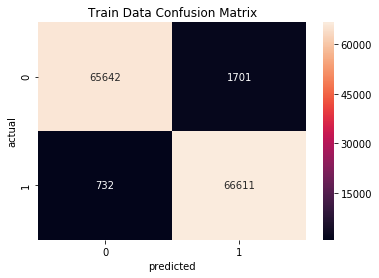

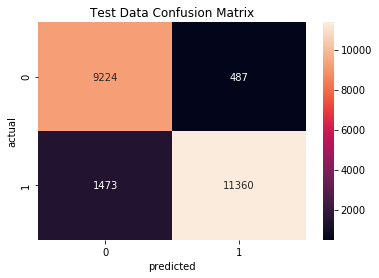

In [251]:
sns.heatmap(pd.crosstab(train_predict['actual'], train_predict['predicted']), annot=True, fmt='.0f')
plt.title('Train Data Confusion Matrix')
plt.show()
sns.heatmap(pd.crosstab(test_predict['actual'], test_predict['predicted']), annot=True, fmt='.0f')
plt.title('Test Data Confusion Matrix')
plt.show()


In [252]:
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(train_predict.actual, train_predict.predicted))
print("The overall accuracy score for the Test Data  is : ", metrics.accuracy_score(test_predict.actual, test_predict.predicted))

The overall accuracy score for the Train Data is :  0.9819357616975781
The overall accuracy score for the Test Data  is :  0.9130589070262598


In [253]:
print(metrics.classification_report(train_predict.actual, train_predict.predicted))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     67343
           1       0.98      0.99      0.98     67343

   micro avg       0.98      0.98      0.98    134686
   macro avg       0.98      0.98      0.98    134686
weighted avg       0.98      0.98      0.98    134686



In [254]:
print(metrics.classification_report(test_predict.actual, test_predict.predicted))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      9711
           1       0.96      0.89      0.92     12833

   micro avg       0.91      0.91      0.91     22544
   macro avg       0.91      0.92      0.91     22544
weighted avg       0.92      0.91      0.91     22544



#### Another way to get the Optimal cut-off point using metrics.roc_curve and metrics.auc

In [255]:
#How good the model is?
predict_proba_df = pd.DataFrame( rdm_final.predict_proba( train_X ) )

predict_proba_df.columns= ['P_no', 'P_yes']

predict_proba_df.head()

,P_no,P_yes
0,0.915896,0.084104
1,0.141495,0.858505
2,0.003310,0.996690
3,0.987586,0.012414
4,0.987487,0.012513


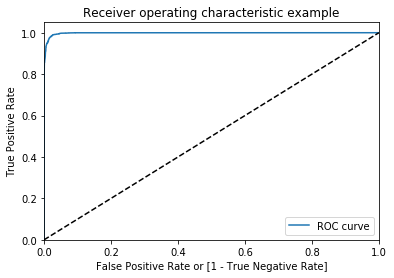

In [256]:
# Finding the optimal cutoff probability
fpr, tpr, thresholds = metrics.roc_curve( train_y,
                                     predict_proba_df.P_yes,
                                     drop_intermediate = False )

plt.figure(figsize=(6, 4))
plt.plot( fpr, tpr, label='ROC curve' )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [257]:
roc_auc = metrics.auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.998410


### Decile Analysis

In [258]:
train_predict.head()

,actual,prob,predicted
0,0,0.084104,0
1,0,0.858505,1
2,1,0.996690,1
3,0,0.012414,0
4,0,0.012513,0


In [259]:
train_predict.shape

(134686, 3)

In [260]:
a = pd.qcut(train_predict.prob.rank(method='first'),10,labels=False)

In [261]:
a.value_counts()

9    13469
7    13469
5    13469
3    13469
1    13469
0    13469
8    13468
6    13468
4    13468
2    13468
Name: prob, dtype: int64

In [262]:
a.shape

(134686,)

In [263]:
b = pd.qcut(test_predict.prob.rank(method='first'),10,labels=False)

In [264]:
b.shape

(22544,)

In [265]:
b.value_counts()

9    2255
6    2255
3    2255
0    2255
8    2254
7    2254
5    2254
4    2254
2    2254
1    2254
Name: prob, dtype: int64

In [374]:
train_predict['Deciles'] = pd.qcut(train_predict.prob.rank(method='first'),10,labels=False)

In [268]:
train_predict

,actual,prob,predicted,Deciles
0,0,0.084104,0,4
1,0,0.858505,1,5
2,1,0.996690,1,6
3,0,0.012414,0,0
4,0,0.012513,0,1
5,1,0.996690,1,6
6,1,0.996690,1,6
7,1,0.996690,1,6
8,1,0.996690,1,6
9,1,0.996690,1,6


In [269]:
# Decile Analysis for train data

no_1s = train_predict[['Deciles','actual']].groupby(train_predict.Deciles).sum().sort_index(ascending=False)['actual']
no_total = train_predict[['Deciles','actual']].groupby(train_predict.Deciles).count().sort_index(ascending=False)['actual']
max_prob = train_predict[['Deciles','prob']].groupby(train_predict.Deciles).max().sort_index(ascending=False)['prob']
min_prob = train_predict[['Deciles','prob']].groupby(train_predict.Deciles).min().sort_index(ascending=False)['prob']

In [270]:
Decile_analysis_train = pd.concat([max_prob, min_prob, no_1s, no_total-no_1s, no_total], axis=1)

Decile_analysis_train

,prob,prob,actual,actual,actual
Deciles,,,,,
9,0.996690,0.996690,13469,0,13469
8,0.996690,0.996690,13468,0,13468
7,0.996690,0.996690,13469,0,13469
6,0.996690,0.908145,13441,27,13468
5,0.908145,0.547138,12159,1310,13469
4,0.547138,0.052493,1337,12131,13468
3,0.052493,0.017550,0,13469,13469
2,0.017550,0.012513,0,13468,13468
1,0.012513,0.012414,0,13469,13469


In [271]:
Decile_analysis_train.columns = ["Max_Prob","Min_Prob","# of 1's","# of 0's", "Total"]

In [272]:
Decile_analysis_train
# No.of 1's should be more in numbers in the higher Deciles and lower in the lower deciles (Should be present in Descending order)
# No.of 0's should be less in the higher deciles and more in the lower deciles (Increasing order)

,Max_Prob,Min_Prob,# of 1's,# of 0's,Total
Deciles,,,,,
9,0.996690,0.996690,13469,0,13469
8,0.996690,0.996690,13468,0,13468
7,0.996690,0.996690,13469,0,13469
6,0.996690,0.908145,13441,27,13468
5,0.908145,0.547138,12159,1310,13469
4,0.547138,0.052493,1337,12131,13468
3,0.052493,0.017550,0,13469,13469
2,0.017550,0.012513,0,13468,13468
1,0.012513,0.012414,0,13469,13469


In [274]:
Decile_analysis_train.to_excel('DecileAnalysisTrain-Binary1.xlsx')

In [275]:
test_predict['Deciles'] = pd.qcut(test_predict.prob.rank(method='first'),10,labels=False)

In [276]:
test_predict.head()

,actual,prob,predicted,Deciles
0,1,0.996690,1,8
1,1,0.996690,1,8
2,0,0.073416,0,3
3,1,0.908145,1,7
4,1,0.756490,1,6


In [277]:
# Decile Analysis for test data

no_1s = test_predict[['Deciles','actual']].groupby(test_predict.Deciles).sum().sort_index(ascending=False)['actual']
no_total = test_predict[['Deciles','actual']].groupby(test_predict.Deciles).count().sort_index(ascending=False)['actual']
max_prob = test_predict[['Deciles','prob']].groupby(test_predict.Deciles).max().sort_index(ascending=False)['prob']
min_prob = test_predict[['Deciles','prob']].groupby(test_predict.Deciles).min().sort_index(ascending=False)['prob']

Decile_analysis_test = pd.concat([max_prob, min_prob, no_1s, no_total-no_1s, no_total], axis=1)

Decile_analysis_test

,prob,prob,actual,actual,actual
Deciles,,,,,
9,0.996690,0.996690,2255,0,2255
8,0.996690,0.989671,2254,0,2254
7,0.989671,0.821798,2047,207,2254
6,0.821798,0.689396,2093,162,2255
5,0.689396,0.551230,2154,100,2254
4,0.551230,0.140902,1509,745,2254
3,0.140902,0.017550,521,1734,2255
2,0.017550,0.012513,0,2254,2254
1,0.012513,0.012414,0,2254,2254


In [278]:
Decile_analysis_test.columns = ["Max_Prob","Min_Prob","# of 1's","# of 0's","Total"]

In [279]:
Decile_analysis_test

# No.of 1's should be more in numbers in the higher Deciles and lower in the lower deciles (Should be present in Descending order)
# No.of 0's should be less in the higher deciles and more in the lower deciles (Increasing order)

,Max_Prob,Min_Prob,# of 1's,# of 0's,Total
Deciles,,,,,
9,0.996690,0.996690,2255,0,2255
8,0.996690,0.989671,2254,0,2254
7,0.989671,0.821798,2047,207,2254
6,0.821798,0.689396,2093,162,2255
5,0.689396,0.551230,2154,100,2254
4,0.551230,0.140902,1509,745,2254
3,0.140902,0.017550,521,1734,2255
2,0.017550,0.012513,0,2254,2254
1,0.012513,0.012414,0,2254,2254


In [280]:
Decile_analysis_test.to_excel('DecileAnalysisTest-Binary1.xlsx')

### KNN

In [786]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [682]:
tuned_parameters = [{'n_neighbors': [3,5, 7, 9,11]}]

knn_clf = GridSearchCV(KNeighborsClassifier(),
                   tuned_parameters,
                   cv=5,
                   scoring='recall')

In [787]:
knn_clf.fit(train_X, train_y)

#knn_clf.best_score_

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_neighbors': [3, 5, 7, 9, 11]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [684]:
knn_clf.best_params_

{'n_neighbors': 3}

In [788]:
knn_final = KNeighborsClassifier(n_neighbors=3,n_jobs=-1)

In [789]:
knn_final.fit(train_X,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
           weights='uniform')

### ROC_AUC = 99 and 82

In [790]:
metrics.roc_auc_score(train_y,knn_final.predict(train_X))

0.9963173103576817

In [791]:
metrics.roc_auc_score(test_y,knn_final.predict(test_X))

0.8734008336924012

In [792]:
metrics.recall_score(train_y,knn_final.predict(train_X))

0.9970151799420092

In [793]:
metrics.recall_score(test_y,knn_final.predict(test_X))

0.8196057040442609

In [794]:
print(metrics.classification_report(test_y,knn_final.predict(test_X)))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      9711
           1       0.94      0.82      0.87     12833

   micro avg       0.87      0.87      0.87     22544
   macro avg       0.87      0.87      0.87     22544
weighted avg       0.88      0.87      0.87     22544



### Testing Data Preparation And Analysis

In [127]:
# Identifying the proper column names to the data set.

#column names
names = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot",
         "num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations",
         "num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate",
         "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate", "srv_diff_host_rate",
         "dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
         "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate",
         "dst_host_srv_rerror_rate","attack", "last_flag"]

data_test = pd.read_csv(r"E:\DSP\DSP_22nd Nov\Machine Learning\FInal Class\Case Studies & FInal Projects\3\NSL_Dataset\Test.txt",names=names)
data_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [128]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 43 columns):
duration                       22544 non-null int64
protocol_type                  22544 non-null object
service                        22544 non-null object
flag                           22544 non-null object
src_bytes                      22544 non-null int64
dst_bytes                      22544 non-null int64
land                           22544 non-null int64
wrong_fragment                 22544 non-null int64
urgent                         22544 non-null int64
hot                            22544 non-null int64
num_failed_logins              22544 non-null int64
logged_in                      22544 non-null int64
num_compromised                22544 non-null int64
root_shell                     22544 non-null int64
su_attempted                   22544 non-null int64
num_root                       22544 non-null int64
num_file_creations             22544 non-null int64
num_

In [ ]:
output2 = pandas_profiling.ProfileReport(data_test)
output2.to_file(outputfile = "pandas_profiling_test1.html")

In [129]:
data_test.drop(columns=["dst_host_rerror_rate","dst_host_serror_rate","dst_host_srv_rerror_rate",
                        "dst_host_srv_serror_rate","num_outbound_cmds","num_root","srv_rerror_rate","srv_serror_rate"],axis = 1,inplace = True)

In [130]:
data_test.info() # 8 variables removed , 35 variables left

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 35 columns):
duration                       22544 non-null int64
protocol_type                  22544 non-null object
service                        22544 non-null object
flag                           22544 non-null object
src_bytes                      22544 non-null int64
dst_bytes                      22544 non-null int64
land                           22544 non-null int64
wrong_fragment                 22544 non-null int64
urgent                         22544 non-null int64
hot                            22544 non-null int64
num_failed_logins              22544 non-null int64
logged_in                      22544 non-null int64
num_compromised                22544 non-null int64
root_shell                     22544 non-null int64
su_attempted                   22544 non-null int64
num_file_creations             22544 non-null int64
num_shells                     22544 non-null int64
num_

In [131]:
data_test["target"] = np.where(data_test.attack == "normal",0,1)

In [132]:
data_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,attack,last_flag,target
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,255,10,0.04,0.06,0.00,0.00,neptune,21,1
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,255,1,0.00,0.06,0.00,0.00,neptune,21,1
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.00,134,86,0.61,0.04,0.61,0.02,normal,21,0
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,3,57,1.00,0.00,1.00,0.28,saint,15,1
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.75,29,86,0.31,0.17,0.03,0.02,mscan,11,1


In [133]:
data_test.drop(["attack"],axis = 1,inplace = True)

In [134]:
numeric_var_names=[key for key in dict(data_test.dtypes) if dict(data_test.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(data_test.dtypes) if dict(data_test.dtypes)[key] in ['object']]
print(numeric_var_names)
print(cat_var_names)

['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'last_flag', 'target']
['protocol_type', 'service', 'flag']


In [135]:
data_test_cat = data_test[cat_var_names]

In [136]:
data_test_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 3 columns):
protocol_type    22544 non-null object
service          22544 non-null object
flag             22544 non-null object
dtypes: object(3)
memory usage: 528.5+ KB


In [137]:
data_test_num = data_test[numeric_var_names]

In [138]:
data_test_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 32 columns):
duration                       22544 non-null int64
src_bytes                      22544 non-null int64
dst_bytes                      22544 non-null int64
land                           22544 non-null int64
wrong_fragment                 22544 non-null int64
urgent                         22544 non-null int64
hot                            22544 non-null int64
num_failed_logins              22544 non-null int64
logged_in                      22544 non-null int64
num_compromised                22544 non-null int64
root_shell                     22544 non-null int64
su_attempted                   22544 non-null int64
num_file_creations             22544 non-null int64
num_shells                     22544 non-null int64
num_access_files               22544 non-null int64
is_host_login                  22544 non-null int64
is_guest_login                 22544 non-null int64
count  

In [139]:
data_test_num.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'last_flag', 'target'],
      dtype='object')

In [140]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

for c_feature in data_test_cat.columns:
    data_test_cat[c_feature] = data_test_cat[c_feature].astype('category')
    data_test_cat = create_dummies(data_test_cat , c_feature )

C:\Users\Akhtar\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [141]:
data_test_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 75 columns):
protocol_type_tcp      22544 non-null uint8
protocol_type_udp      22544 non-null uint8
service_X11            22544 non-null uint8
service_Z39_50         22544 non-null uint8
service_auth           22544 non-null uint8
service_bgp            22544 non-null uint8
service_courier        22544 non-null uint8
service_csnet_ns       22544 non-null uint8
service_ctf            22544 non-null uint8
service_daytime        22544 non-null uint8
service_discard        22544 non-null uint8
service_domain         22544 non-null uint8
service_domain_u       22544 non-null uint8
service_echo           22544 non-null uint8
service_eco_i          22544 non-null uint8
service_ecr_i          22544 non-null uint8
service_efs            22544 non-null uint8
service_exec           22544 non-null uint8
service_finger         22544 non-null uint8
service_ftp            22544 non-null uint8
service_ftp

In [142]:
#subsetting service column
trainservice = data_train['service'].tolist()
testservice = data_test['service'].tolist()

In [143]:
#extracting additional service categories on training data
difference = list(set(trainservice) - set(testservice))

In [144]:
difference

['http_8001', 'http_2784', 'red_i', 'urh_i', 'aol', 'harvest']

In [145]:
#Making column names for additional serrvice features
string = 'service_'
difference=[string + x for x in difference]
difference

['service_http_8001',
 'service_http_2784',
 'service_red_i',
 'service_urh_i',
 'service_aol',
 'service_harvest']

In [146]:
#labelling additional columns with zeroes in test data
for col in difference:
    data_test_cat[col] = 0

In [147]:
data_test_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 81 columns):
protocol_type_tcp      22544 non-null uint8
protocol_type_udp      22544 non-null uint8
service_X11            22544 non-null uint8
service_Z39_50         22544 non-null uint8
service_auth           22544 non-null uint8
service_bgp            22544 non-null uint8
service_courier        22544 non-null uint8
service_csnet_ns       22544 non-null uint8
service_ctf            22544 non-null uint8
service_daytime        22544 non-null uint8
service_discard        22544 non-null uint8
service_domain         22544 non-null uint8
service_domain_u       22544 non-null uint8
service_echo           22544 non-null uint8
service_eco_i          22544 non-null uint8
service_ecr_i          22544 non-null uint8
service_efs            22544 non-null uint8
service_exec           22544 non-null uint8
service_finger         22544 non-null uint8
service_ftp            22544 non-null uint8
service_ftp

In [94]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=data_test_num.apply(lambda x: var_summary(x)).T

In [95]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
duration,22544.0,0.0,4.933959e+06,218.859076,0.00,1407.176612,1.980146e+06,0.0,0.0,0.00,0.00,0.00,0.00,0.00,4.00,283.00,7589.5700,57715.0
src_bytes,22544.0,0.0,2.343550e+08,10395.450231,54.00,472786.431088,2.235270e+11,0.0,0.0,0.00,0.00,0.00,54.00,287.00,1032.00,15876.00,283618.0000,62825648.0
dst_bytes,22544.0,0.0,4.635089e+07,2056.018808,46.00,21219.297609,4.502586e+08,0.0,0.0,0.00,0.00,0.00,46.00,601.00,4099.10,8314.00,26032.0400,1345927.0
land,22544.0,0.0,7.000000e+00,0.000311,0.00,0.017619,3.104213e-04,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,1.0
wrong_fragment,22544.0,0.0,1.900000e+02,0.008428,0.00,0.142599,2.033441e-02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,3.0
urgent,22544.0,0.0,1.600000e+01,0.000710,0.00,0.036473,1.330286e-03,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,3.0
hot,22544.0,0.0,2.376000e+03,0.105394,0.00,0.928428,8.619786e-01,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.0000,101.0
num_failed_logins,22544.0,0.0,4.880000e+02,0.021647,0.00,0.150328,2.259843e-02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0000,4.0
logged_in,22544.0,0.0,9.969000e+03,0.442202,0.00,0.496659,2.466703e-01,0.0,0.0,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.0000,1.0
num_compromised,22544.0,0.0,2.703000e+03,0.119899,0.00,7.269597,5.284704e+01,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0000,796.0


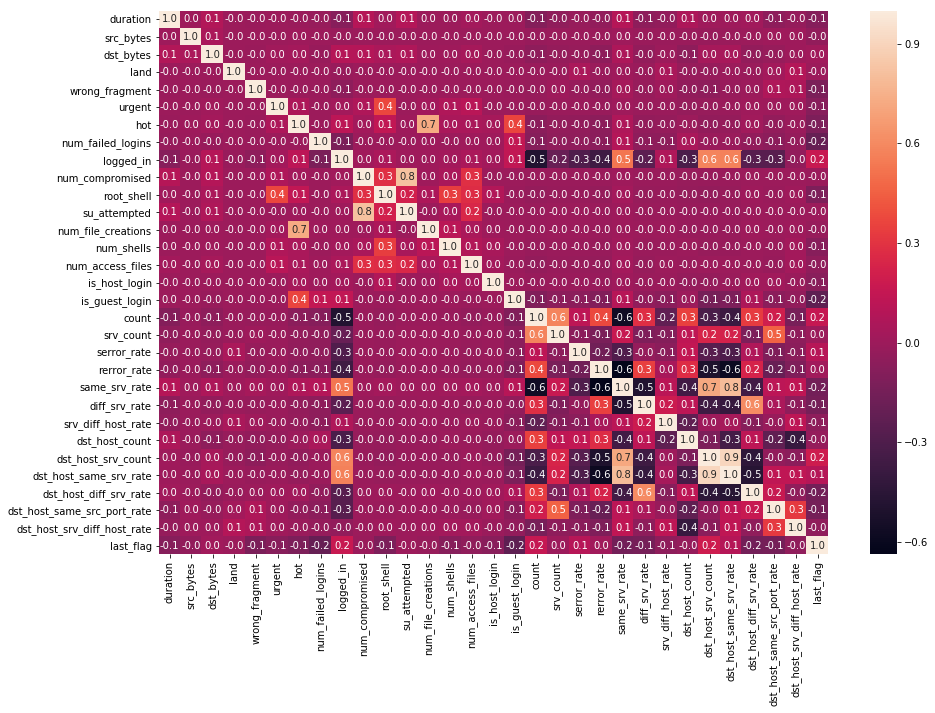

In [159]:
plt.subplots(figsize = (15,10))
sns.heatmap(data_test_num.corr(), annot=True , fmt="1.1f")

In [148]:
data_test_new = pd.concat([data_test_cat,data_test_num],axis=1)

In [149]:
data_test_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Columns: 113 entries, protocol_type_tcp to target
dtypes: float64(9), int32(1), int64(28), uint8(75)
memory usage: 8.1 MB


In [150]:
data_test_new.isnull().sum()

protocol_type_tcp              0
protocol_type_udp              0
service_X11                    0
service_Z39_50                 0
service_auth                   0
service_bgp                    0
service_courier                0
service_csnet_ns               0
service_ctf                    0
service_daytime                0
service_discard                0
service_domain                 0
service_domain_u               0
service_echo                   0
service_eco_i                  0
service_ecr_i                  0
service_efs                    0
service_exec                   0
service_finger                 0
service_ftp                    0
service_ftp_data               0
service_gopher                 0
service_hostnames              0
service_http                   0
service_http_443               0
service_imap4                  0
service_iso_tsap               0
service_klogin                 0
service_kshell                 0
service_ldap                   0
          

In [99]:
list_vars  #Previously without executing through logit 

['count',
 'diff_srv_rate',
 'dst_host_count',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_count',
 'flag_REJ',
 'flag_RSTO',
 'flag_RSTR',
 'last_flag',
 'logged_in',
 'protocol_type_udp',
 'service_Z39_50',
 'service_bgp',
 'service_courier',
 'service_csnet_ns',
 'service_ctf',
 'service_domain_u',
 'service_eco_i',
 'service_ecr_i',
 'service_ftp_data',
 'service_imap4',
 'service_iso_tsap',
 'service_nnsp',
 'service_private',
 'service_smtp',
 'service_supdup',
 'service_uucp',
 'service_uucp_path',
 'service_vmnet',
 'service_whois',
 'srv_diff_host_rate',
 'wrong_fragment']

In [151]:
list_vars2   # After executing logit

['count',
 'diff_srv_rate',
 'dst_host_count',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_count',
 'flag_REJ',
 'flag_RSTR',
 'last_flag',
 'logged_in',
 'protocol_type_udp',
 'service_domain_u',
 'service_eco_i',
 'service_ecr_i',
 'service_ftp_data',
 'service_private',
 'service_smtp',
 'srv_diff_host_rate',
 'wrong_fragment']

In [363]:
test_X = data_test_new[list_vars2]

In [364]:
test_X.head()

,count,diff_srv_rate,dst_host_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_count,flag_REJ,flag_RSTR,last_flag,logged_in,protocol_type_udp,service_domain_u,service_eco_i,service_ecr_i,service_ftp_data,service_private,service_smtp,srv_diff_host_rate,wrong_fragment
0,229,0.06,255,0.06,0.00,10,1,0,21,0,0,0,0,0,0,1,0,0.00,0
1,136,0.06,255,0.06,0.00,1,1,0,21,0,0,0,0,0,0,1,0,0.00,0
2,1,0.00,134,0.04,0.61,86,0,0,21,0,0,0,0,0,1,0,0,0.00,0
3,1,0.00,3,0.00,1.00,57,0,0,15,0,0,0,1,0,0,0,0,1.00,0
4,1,0.00,29,0.17,0.03,86,0,0,11,0,0,0,0,0,0,0,0,0.75,0


In [365]:
test_X.shape

(22544, 19)

In [349]:
test_y = data_test['target']

In [350]:
test_y.value_counts()

1    12833
0     9711
Name: target, dtype: int64